In [105]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [106]:
df = pd.read_excel(r'C:\Users\Muthusamy\Documents\MIssion 2024\My Project\Fastag\FastagStatementReport.xlsx')    
df

,Transaction Date,Transaction Ref No.,Transaction Type,Debit Amount (Rs.),Credit Amount (Rs.),Balance (Rs.),Plaza Name
0,07/03/2024 11:28:05,003616065193,Issuer Debit Transaction for toll fare - 05700...,330,0,3620.73,"Rasampalayam Plaza - Namakkal, Tamil Nadu"
1,07/03/2024 10:20:01,003615880960,Issuer Debit Transaction for toll fare - 17000...,620,0,3950.73,"Velanchettiyur - Dindigul, Tamil Nadu"
2,07/03/2024 02:34:31,003614999113,Issuer Debit Transaction for toll fare - 05600...,420,0,4570.73,"Kozhinjiipatti Plaza - Dindigul, Tamil Nadu"
3,04/03/2024 22:36:09,003607905158,Issuer Debit Transaction for toll fare - 05600...,420,0,4990.73,"Kozhinjiipatti Plaza - Dindigul, Tamil Nadu"
4,04/03/2024 21:09:16,003607717501,Issuer Debit Transaction for toll fare - 17000...,620,0,5410.73,"Velanchettiyur - Dindigul, Tamil Nadu"
...,...,...,...,...,...,...,...
7608,30/11/2019 13:42:47,00397138669,Issuer Debit Transaction for toll fare - 06000...,365,0,22090.00,"Krishnagiri Plaza - Krishnagiri, Tamil Nadu"
7609,30/11/2019 12:04:34,00397083042,Issuer Debit Transaction for toll fare - 16900...,545,0,22455.00,"L And T Krishnagiri Thopur - Dharmapuri, Tamil..."
7610,30/11/2019 10:29:54,NaN,NaN,0,2000,23000.00,NaN
7611,30/11/2019 10:24:09,NaN,NaN,0,10000,21000.00,NaN


In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Transaction Date     7613 non-null   object 
 1   Transaction Ref No.  7520 non-null   object 
 2   Transaction Type     7520 non-null   object 
 3   Debit Amount (Rs.)   7613 non-null   int64  
 4   Credit Amount (Rs.)  7613 non-null   int64  
 5   Balance (Rs.)        7613 non-null   float64
 6   Plaza Name           7413 non-null   object 
dtypes: float64(1), int64(2), object(4)
memory usage: 416.5+ KB


In [108]:
df.dtypes

Transaction Date        object
Transaction Ref No.     object
Transaction Type        object
Debit Amount (Rs.)       int64
Credit Amount (Rs.)      int64
Balance (Rs.)          float64
Plaza Name              object
dtype: object

In [109]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Debit Amount (Rs.),7613.0,471.459477,173.488976,0.00,380.00,475.00,590.00,1395.00
Credit Amount (Rs.),7613.0,472.574544,3697.185997,0.00,0.00,0.00,0.00,45000.00
Balance (Rs.),7613.0,23928.987918,11792.487495,366.73,14259.73,23581.73,33036.73,61921.73


In [110]:
df.isna().sum()

Transaction Date         0
Transaction Ref No.     93
Transaction Type        93
Debit Amount (Rs.)       0
Credit Amount (Rs.)      0
Balance (Rs.)            0
Plaza Name             200
dtype: int64

# Null Percentage

In [111]:
null_data = (df.isnull().mean()*100).round(2)

In [112]:
null_data.index

Index(['Transaction Date', 'Transaction Ref No.', 'Transaction Type',
       'Debit Amount (Rs.)', 'Credit Amount (Rs.)', 'Balance (Rs.)',
       'Plaza Name'],
      dtype='object')

In [113]:
pd.DataFrame({
    "column_name": null_data.index,
    "Null Perc":null_data.values
}).sort_values("Null Perc",ascending=False)

,column_name,Null Perc
6,Plaza Name,2.63
1,Transaction Ref No.,1.22
2,Transaction Type,1.22
0,Transaction Date,0.00
3,Debit Amount (Rs.),0.00
4,Credit Amount (Rs.),0.00
5,Balance (Rs.),0.00


# Duplicated Rows in Dataset

In [114]:
df.duplicated().sum()

0

# Number of "0" data availablity - sparcity

In [115]:
col_with_zero = []
for i in df.columns:
    perc_zero = (df[i]==0).mean()*100
    col_with_zero.append((i,perc_zero))

zero_percent = pd.DataFrame(col_with_zero,columns=['column_name','zero_percentage']).sort_values("zero_percentage",ascending=False)
zero_percent

,column_name,zero_percentage
4,Credit Amount (Rs.),97.648759
3,Debit Amount (Rs.),2.351241
0,Transaction Date,0.000000
1,Transaction Ref No.,0.000000
2,Transaction Type,0.000000
5,Balance (Rs.),0.000000
6,Plaza Name,0.000000


# Drop Unwanted Columns 

In [116]:
df = df.drop(columns=['Transaction Ref No.'],axis=1)

df.head()

,Transaction Date,Transaction Type,Debit Amount (Rs.),Credit Amount (Rs.),Balance (Rs.),Plaza Name
0,07/03/2024 11:28:05,Issuer Debit Transaction for toll fare - 05700...,330,0,3620.73,"Rasampalayam Plaza - Namakkal, Tamil Nadu"
1,07/03/2024 10:20:01,Issuer Debit Transaction for toll fare - 17000...,620,0,3950.73,"Velanchettiyur - Dindigul, Tamil Nadu"
2,07/03/2024 02:34:31,Issuer Debit Transaction for toll fare - 05600...,420,0,4570.73,"Kozhinjiipatti Plaza - Dindigul, Tamil Nadu"
3,04/03/2024 22:36:09,Issuer Debit Transaction for toll fare - 05600...,420,0,4990.73,"Kozhinjiipatti Plaza - Dindigul, Tamil Nadu"
4,04/03/2024 21:09:16,Issuer Debit Transaction for toll fare - 17000...,620,0,5410.73,"Velanchettiyur - Dindigul, Tamil Nadu"


# Change Datatype

In [117]:
df['Transaction Date'] = pd.to_datetime(df['Transaction Date'], format='%d/%m/%Y %H:%M:%S')

df.head()

# # Convert the 'date_time_string' column to datetime
# df['date_time'] = pd.to_datetime(df['date_time_string'], format='%m/%d/%Y %H:%M:%S')

,Transaction Date,Transaction Type,Debit Amount (Rs.),Credit Amount (Rs.),Balance (Rs.),Plaza Name
0,2024-03-07 11:28:05,Issuer Debit Transaction for toll fare - 05700...,330,0,3620.73,"Rasampalayam Plaza - Namakkal, Tamil Nadu"
1,2024-03-07 10:20:01,Issuer Debit Transaction for toll fare - 17000...,620,0,3950.73,"Velanchettiyur - Dindigul, Tamil Nadu"
2,2024-03-07 02:34:31,Issuer Debit Transaction for toll fare - 05600...,420,0,4570.73,"Kozhinjiipatti Plaza - Dindigul, Tamil Nadu"
3,2024-03-04 22:36:09,Issuer Debit Transaction for toll fare - 05600...,420,0,4990.73,"Kozhinjiipatti Plaza - Dindigul, Tamil Nadu"
4,2024-03-04 21:09:16,Issuer Debit Transaction for toll fare - 17000...,620,0,5410.73,"Velanchettiyur - Dindigul, Tamil Nadu"


In [118]:
df.dtypes

Transaction Date       datetime64[ns]
Transaction Type               object
Debit Amount (Rs.)              int64
Credit Amount (Rs.)             int64
Balance (Rs.)                 float64
Plaza Name                     object
dtype: object

# Using Iloc to get the Row value

In [119]:
df.iloc[7526]

Transaction Date                                     2019-12-14 19:35:43
Transaction Type       Issuer Debit Transaction for toll fare - 35002...
Debit Amount (Rs.)                                                   415
Credit Amount (Rs.)                                                    0
Balance (Rs.)                                                    30420.0
Plaza Name                              Pippalwada - Adilabad, Telangana
Name: 7526, dtype: object

In [120]:
[df.iloc[7526]]

# df.iloc[7526]

[Transaction Date                                     2019-12-14 19:35:43
 Transaction Type       Issuer Debit Transaction for toll fare - 35002...
 Debit Amount (Rs.)                                                   415
 Credit Amount (Rs.)                                                    0
 Balance (Rs.)                                                    30420.0
 Plaza Name                              Pippalwada - Adilabad, Telangana
 Name: 7526, dtype: object]

# Using Loc to get the Column Value

In [121]:
df.loc[2]

Transaction Date                                     2024-03-07 02:34:31
Transaction Type       Issuer Debit Transaction for toll fare - 05600...
Debit Amount (Rs.)                                                   420
Credit Amount (Rs.)                                                    0
Balance (Rs.)                                                    4570.73
Plaza Name                   Kozhinjiipatti Plaza - Dindigul, Tamil Nadu
Name: 2, dtype: object

In [122]:
df.loc[[2,6]]

,Transaction Date,Transaction Type,Debit Amount (Rs.),Credit Amount (Rs.),Balance (Rs.),Plaza Name
2,2024-03-07 02:34:31,Issuer Debit Transaction for toll fare - 05600...,420,0,4570.73,"Kozhinjiipatti Plaza - Dindigul, Tamil Nadu"
6,2024-03-02 11:52:41,Issuer Debit Transaction for toll fare - 16900...,685,0,6360.73,"L And T Krishnagiri Thopur - Dharmapuri, Tamil..."


In [123]:
df[['Plaza Name']]

,Plaza Name
0,"Rasampalayam Plaza - Namakkal, Tamil Nadu"
1,"Velanchettiyur - Dindigul, Tamil Nadu"
2,"Kozhinjiipatti Plaza - Dindigul, Tamil Nadu"
3,"Kozhinjiipatti Plaza - Dindigul, Tamil Nadu"
4,"Velanchettiyur - Dindigul, Tamil Nadu"
...,...
7608,"Krishnagiri Plaza - Krishnagiri, Tamil Nadu"
7609,"L And T Krishnagiri Thopur - Dharmapuri, Tamil..."
7610,NaN
7611,NaN


In [124]:
df.loc[2,'Plaza Name']

'Kozhinjiipatti Plaza - Dindigul, Tamil Nadu'

In [125]:
df.loc[10:20]

,Transaction Date,Transaction Type,Debit Amount (Rs.),Credit Amount (Rs.),Balance (Rs.),Plaza Name
10,2024-03-02 01:55:42,Issuer Debit Transaction for toll fare - 35202...,720,0,8485.73,"Marur - Anantapuram, Andhra Pradesh"
11,2024-03-02 00:03:07,Issuer Debit Transaction for toll fare - 35202...,650,0,9205.73,"Kasepalli - Anantapuram, Andhra Pradesh"
12,2024-03-01 22:35:12,Issuer Debit Transaction for toll fare - 35202...,695,0,9855.73,"Amakthadu - Kurnool, Andhra Pradesh"
13,2024-03-01 21:15:20,Issuer Debit Transaction for toll fare - 35000...,700,0,10550.73,"Pullur - Mahabubnagar, Telangana"
14,2024-03-01 18:42:16,Issuer Debit Transaction for toll fare - 07900...,445,0,11250.73,"Sakapur - Mahabubnagar, Telangana"
15,2024-03-01 17:18:03,Issuer Debit Transaction for toll fare - 03400...,460,0,11695.73,"Raikal - Mahabubnagar, Telangana"
16,2024-03-01 16:10:03,Issuer Debit Transaction for toll fare - 55001...,840,0,12155.73,"Shamshabad - Hyderabad, Telangana"
17,2024-03-01 13:47:20,Issuer Debit Transaction for toll fare - 35002...,470,0,12995.73,"Manoharabad - Medak, Telangana"
18,2024-03-01 12:34:09,Issuer Debit Transaction for toll fare - 35002...,480,0,13465.73,"Bhiknoor - Nizamabad, Telangana"
19,2024-03-01 11:12:24,Issuer Debit Transaction for toll fare - 07800...,455,0,13945.73,"Indalwai - Nizamabad, Telangana"


In [126]:
df.loc[[4],['Debit Amount (Rs.)']]

,Debit Amount (Rs.)
4,620


In [127]:
df.loc[[4,10],['Debit Amount (Rs.)','Plaza Name']]

,Debit Amount (Rs.),Plaza Name
4,620,"Velanchettiyur - Dindigul, Tamil Nadu"
10,720,"Marur - Anantapuram, Andhra Pradesh"


In [128]:
df.loc[:,['Plaza Name']]

,Plaza Name
0,"Rasampalayam Plaza - Namakkal, Tamil Nadu"
1,"Velanchettiyur - Dindigul, Tamil Nadu"
2,"Kozhinjiipatti Plaza - Dindigul, Tamil Nadu"
3,"Kozhinjiipatti Plaza - Dindigul, Tamil Nadu"
4,"Velanchettiyur - Dindigul, Tamil Nadu"
...,...
7608,"Krishnagiri Plaza - Krishnagiri, Tamil Nadu"
7609,"L And T Krishnagiri Thopur - Dharmapuri, Tamil..."
7610,NaN
7611,NaN


# TRANSACTION TYPE NULL VALUES

In [129]:
tranull = df[df['Transaction Type'].isna()]

tranull

,Transaction Date,Transaction Type,Debit Amount (Rs.),Credit Amount (Rs.),Balance (Rs.),Plaza Name
1568,2023-04-27 10:35:59,NaN,0,5000,7104.73,NaN
1901,2023-02-17 14:56:20,NaN,0,30000,42066.73,NaN
2157,2023-01-01 20:13:31,NaN,0,40000,50120.73,NaN
2250,2022-12-15 13:40:27,NaN,0,10000,10948.73,NaN
2328,2022-12-06 11:07:37,NaN,0,40000,42428.73,NaN
...,...,...,...,...,...,...
7574,2019-12-05 14:05:32,NaN,0,5000,16655.00,NaN
7575,2019-12-05 13:58:54,NaN,0,5000,11655.00,NaN
7610,2019-11-30 10:29:54,NaN,0,2000,23000.00,NaN
7611,2019-11-30 10:24:09,NaN,0,10000,21000.00,NaN


In [130]:
tra_null_index = df[df['Transaction Type'] .isna()].index

In [131]:
tra_null_index

Index([1568, 1901, 2157, 2250, 2328, 2404, 2477, 2478, 2562, 2641, 2718, 2794,
       2880, 2881, 2954, 2988, 3606, 3669, 3682, 3759, 3847, 3934, 4011, 4094,
       4180, 4258, 4337, 4414, 4415, 4482, 4570, 4643, 4736, 4805, 4884, 4932,
       4967, 4976, 5050, 5126, 5202, 5278, 5279, 5363, 5438, 5519, 5591, 5671,
       5672, 5705, 5740, 5816, 5893, 5955, 5956, 5965, 6013, 6018, 6024, 6025,
       6112, 6121, 6201, 6205, 6278, 6284, 6358, 6424, 6504, 6588, 6593, 6667,
       6737, 6804, 6871, 6944, 7024, 7095, 7097, 7175, 7185, 7249, 7250, 7323,
       7387, 7463, 7542, 7543, 7574, 7575, 7610, 7611, 7612],
      dtype='int64')

In [132]:
tra_null_index.shape

(93,)

In [133]:
df['Transaction Type'].isna().value_counts()

Transaction Type
False    7520
True       93
Name: count, dtype: int64

In [134]:
df['Transaction Type'].isna().value_counts(normalize=True)

Transaction Type
False    0.987784
True     0.012216
Name: proportion, dtype: float64

# Filling Null Values Of Transaction Type

In [135]:
df['Transaction Type'] = df['Transaction Type'].fillna('Credit From Account')

df[df['Transaction Type'].isna()]

,Transaction Date,Transaction Type,Debit Amount (Rs.),Credit Amount (Rs.),Balance (Rs.),Plaza Name


In [136]:
df['Transaction Type'].isna().value_counts()

Transaction Type
False    7613
Name: count, dtype: int64

In [137]:
df['Transaction Type'].isna().value_counts(normalize=True)

Transaction Type
False    1.0
Name: proportion, dtype: float64

# PLAZA NAME NULL VALUES

In [138]:
plaza_null_index = df[df['Plaza Name'] .isna()].index

plaza_null_index

Index([   8,   37,   52,   82,   83,  136,  165,  167,  226,  256,
       ...
       7323, 7387, 7463, 7542, 7543, 7574, 7575, 7610, 7611, 7612],
      dtype='int64', length=200)

In [139]:
plaza_null_index.shape

(200,)

In [140]:
df['Plaza Name'].isna().value_counts()

Plaza Name
False    7413
True      200
Name: count, dtype: int64

In [141]:
df['Plaza Name'].isna().value_counts(normalize=True)

Plaza Name
False    0.973729
True     0.026271
Name: proportion, dtype: float64

# Filling NUll Values Of Plaza Name

In [142]:
df[df['Plaza Name'] .isna()]

,Transaction Date,Transaction Type,Debit Amount (Rs.),Credit Amount (Rs.),Balance (Rs.),Plaza Name
8,2024-03-02 06:24:31,Issuer Debit Transaction for toll fare - 54602...,380,0,7500.73,NaN
37,2024-02-29 04:04:13,Issuer Debit Transaction for toll fare - 53605...,55,0,24760.73,NaN
52,2024-02-26 23:25:11,Issuer Debit Transaction for toll fare - 53605...,55,0,32120.73,NaN
82,2024-02-24 19:51:31,Issuer Debit Transaction for toll fare - 54602...,380,0,49495.73,NaN
83,2024-02-24 15:28:40,BBPS BILLER A/C Dr.,0,45000,49875.73,NaN
...,...,...,...,...,...,...
7574,2019-12-05 14:05:32,Credit From Account,0,5000,16655.00,NaN
7575,2019-12-05 13:58:54,Credit From Account,0,5000,11655.00,NaN
7610,2019-11-30 10:29:54,Credit From Account,0,2000,23000.00,NaN
7611,2019-11-30 10:24:09,Credit From Account,0,10000,21000.00,NaN


# Fill Null Values Of Plaza Name Based on Credit Amount

In [143]:
df.iloc[81]

Transaction Date                                     2024-02-24 21:52:18
Transaction Type       Issuer Debit Transaction for toll fare - 35601...
Debit Amount (Rs.)                                                   605
Credit Amount (Rs.)                                                    0
Balance (Rs.)                                                   48890.73
Plaza Name                           Bagepalli - Chikballapur, Karnataka
Name: 81, dtype: object

In [144]:
df['Plaza Name'] = df['Plaza Name'].fillna('Tharamangalam - Salem, Tamil Nadu').where(df['Credit Amount (Rs.)'] > 0, df['Plaza Name'])

In [145]:
df.iloc[81]

Transaction Date                                     2024-02-24 21:52:18
Transaction Type       Issuer Debit Transaction for toll fare - 35601...
Debit Amount (Rs.)                                                   605
Credit Amount (Rs.)                                                    0
Balance (Rs.)                                                   48890.73
Plaza Name                           Bagepalli - Chikballapur, Karnataka
Name: 81, dtype: object

# Fill Null Values Of Plaza Name Based on Transaction Type and Location

In [146]:
null_plaza_index = df[df['Plaza Name'] .isna()]
null_plaza_index

,Transaction Date,Transaction Type,Debit Amount (Rs.),Credit Amount (Rs.),Balance (Rs.),Plaza Name
8,2024-03-02 06:24:31,Issuer Debit Transaction for toll fare - 54602...,380,0,7500.73,NaN
37,2024-02-29 04:04:13,Issuer Debit Transaction for toll fare - 53605...,55,0,24760.73,NaN
52,2024-02-26 23:25:11,Issuer Debit Transaction for toll fare - 53605...,55,0,32120.73,NaN
82,2024-02-24 19:51:31,Issuer Debit Transaction for toll fare - 54602...,380,0,49495.73,NaN
136,2024-02-10 00:38:20,Issuer Debit Transaction for toll fare - 53605...,55,0,30538.73,NaN
165,2024-02-07 20:21:18,Issuer Debit Transaction for toll fare - 54602...,380,0,47473.73,NaN
226,2024-01-26 03:00:36,Issuer Debit Transaction for toll fare - 53605...,55,0,30917.73,NaN
256,2024-01-23 21:02:47,Issuer Debit Transaction for toll fare - 54602...,380,0,48292.73,NaN
308,2024-01-11 03:24:21,Issuer Debit Transaction for toll fare - 53605...,55,0,28430.73,NaN
338,2024-01-08 19:53:21,Issuer Debit Transaction for toll fare - 54602...,380,0,45805.73,NaN


In [147]:
null_plaza_index.shape

(27, 6)

# 1

In [148]:
for i in null_plaza_index['Transaction Type']:
    print(i)

Issuer Debit Transaction for toll fare - 546028 - 
Issuer Debit Transaction for toll fare - 536050 - 
Issuer Debit Transaction for toll fare - 536050 - 
Issuer Debit Transaction for toll fare - 546028 - 
Issuer Debit Transaction for toll fare - 536050 - 
Issuer Debit Transaction for toll fare - 546028 - 
Issuer Debit Transaction for toll fare - 536050 - 
Issuer Debit Transaction for toll fare - 546028 - 
Issuer Debit Transaction for toll fare - 536050 - 
Issuer Debit Transaction for toll fare - 546028 - 
Issuer Debit Transaction for toll fare - 546028 - 
Issuer Debit Transaction for toll fare - 536050 - 
Issuer Debit Transaction for toll fare - 536050 - 
Issuer Debit Transaction for toll fare - 546028 - 
Issuer Debit Transaction for toll fare - 546028 - 
Issuer Debit Transaction for toll fare - 536050 - 
Issuer Debit Transaction for toll fare - 536050 - 
Issuer Debit Transaction for toll fare - 546028 - 
Issuer Debit Transaction for toll fare - 546028 - 
Issuer Debit Transaction for to

In [149]:
df.iloc[48:54]

,Transaction Date,Transaction Type,Debit Amount (Rs.),Credit Amount (Rs.),Balance (Rs.),Plaza Name
48,2024-02-27 04:42:10,Issuer Debit Transaction for toll fare - 31204...,480,0,30200.73,"Karman - Palwal, Haryana"
49,2024-02-27 02:42:56,Issuer Debit Transaction for toll fare - 06200...,525,0,30680.73,"Mahuvan - Mathura, Uttar Pradesh"
50,2024-02-27 02:08:15,Issuer Debit Transaction for toll fare - 32005...,420,0,31205.73,"Raibha - Agra, Uttar Pradesh"
51,2024-02-27 01:03:48,Issuer Debit Transaction for toll fare - 12500...,495,0,31625.73,"Baretha Or Jajau - Agra, Uttar Pradesh"
52,2024-02-26 23:25:11,Issuer Debit Transaction for toll fare - 53605...,55,0,32120.73,NaN
53,2024-02-26 23:25:11,Issuer Debit Transaction for toll fare - 12500...,440,0,32175.73,"Choundha - Morena, Madhya Pradesh"


In [150]:
df.iloc[52]['Transaction Type']

'Issuer Debit Transaction for toll fare - 536050 - '

In [151]:
df.iloc[52]

Transaction Date                                     2024-02-26 23:25:11
Transaction Type       Issuer Debit Transaction for toll fare - 53605...
Debit Amount (Rs.)                                                    55
Credit Amount (Rs.)                                                    0
Balance (Rs.)                                                   32120.73
Plaza Name                                                           NaN
Name: 52, dtype: object

In [152]:
df['Plaza Name'] = df['Plaza Name'].fillna('Chounda Morena Flyover - Morena, Madhya Pradesh').where(df['Transaction Type'] == 'Issuer Debit Transaction for toll fare - 536050 - ', df['Plaza Name'])

In [153]:
df.iloc[52]

Transaction Date                                     2024-02-26 23:25:11
Transaction Type       Issuer Debit Transaction for toll fare - 53605...
Debit Amount (Rs.)                                                    55
Credit Amount (Rs.)                                                    0
Balance (Rs.)                                                   32120.73
Plaza Name               Chounda Morena Flyover - Morena, Madhya Pradesh
Name: 52, dtype: object

# 2

In [154]:
null_plaza_index_1 = df[df['Plaza Name'] .isna()]
null_plaza_index_1

,Transaction Date,Transaction Type,Debit Amount (Rs.),Credit Amount (Rs.),Balance (Rs.),Plaza Name
8,2024-03-02 06:24:31,Issuer Debit Transaction for toll fare - 54602...,380,0,7500.73,NaN
82,2024-02-24 19:51:31,Issuer Debit Transaction for toll fare - 54602...,380,0,49495.73,NaN
165,2024-02-07 20:21:18,Issuer Debit Transaction for toll fare - 54602...,380,0,47473.73,NaN
256,2024-01-23 21:02:47,Issuer Debit Transaction for toll fare - 54602...,380,0,48292.73,NaN
338,2024-01-08 19:53:21,Issuer Debit Transaction for toll fare - 54602...,380,0,45805.73,NaN
345,2024-01-05 07:28:59,Issuer Debit Transaction for toll fare - 54602...,380,0,9010.73,NaN
418,2023-12-27 00:44:06,Issuer Debit Transaction for toll fare - 54602...,380,0,48164.73,NaN
435,2023-12-18 06:16:19,Issuer Debit Transaction for toll fare - 54602...,380,0,4254.73,NaN
507,2023-12-09 22:23:31,Issuer Debit Transaction for toll fare - 54602...,380,0,44478.73,NaN
514,2023-12-03 10:22:24,Issuer Debit Transaction for toll fare - 54602...,380,0,7138.73,NaN


In [155]:
null_plaza_index_1.shape

(12, 6)

In [156]:
for i in null_plaza_index_1['Transaction Type']:
    print(i)

Issuer Debit Transaction for toll fare - 546028 - 
Issuer Debit Transaction for toll fare - 546028 - 
Issuer Debit Transaction for toll fare - 546028 - 
Issuer Debit Transaction for toll fare - 546028 - 
Issuer Debit Transaction for toll fare - 546028 - 
Issuer Debit Transaction for toll fare - 546028 - 
Issuer Debit Transaction for toll fare - 546028 - 
Issuer Debit Transaction for toll fare - 546028 - 
Issuer Debit Transaction for toll fare - 546028 - 
Issuer Debit Transaction for toll fare - 546028 - 
Issuer Debit Transaction for toll fare - 546028 - 
Issuer Debit Transaction for toll fare - 712179 - 


In [157]:
df.iloc[80:86]

,Transaction Date,Transaction Type,Debit Amount (Rs.),Credit Amount (Rs.),Balance (Rs.),Plaza Name
80,2024-02-25 00:22:40,Issuer Debit Transaction for toll fare - 35202...,720,0,48170.73,"Marur - Anantapuram, Andhra Pradesh"
81,2024-02-24 21:52:18,Issuer Debit Transaction for toll fare - 35601...,605,0,48890.73,"Bagepalli - Chikballapur, Karnataka"
82,2024-02-24 19:51:31,Issuer Debit Transaction for toll fare - 54602...,380,0,49495.73,NaN
83,2024-02-24 15:28:40,BBPS BILLER A/C Dr.,0,45000,49875.73,"Tharamangalam - Salem, Tamil Nadu"
84,2024-02-24 15:23:11,Issuer Debit Transaction for toll fare - 06000...,455,0,4875.73,"Krishnagiri Plaza - Krishnagiri, Tamil Nadu"
85,2024-02-24 11:53:56,Issuer Debit Transaction for toll fare - 16900...,685,0,5330.73,"L And T Krishnagiri Thopur - Dharmapuri, Tamil..."


In [158]:
df.iloc[82]['Transaction Type']

'Issuer Debit Transaction for toll fare - 546028 - '

In [159]:
df.iloc[84]['Transaction Type']

'Issuer Debit Transaction for toll fare - 060001 - KTP'

In [160]:
df.iloc[82]

Transaction Date                                     2024-02-24 19:51:31
Transaction Type       Issuer Debit Transaction for toll fare - 54602...
Debit Amount (Rs.)                                                   380
Credit Amount (Rs.)                                                    0
Balance (Rs.)                                                   49495.73
Plaza Name                                                           NaN
Name: 82, dtype: object

In [161]:
df['Plaza Name'] = df['Plaza Name'].fillna('Nalluru Devanahalli - Bengaluru, Karnataka').where(df['Transaction Type'] == 'Issuer Debit Transaction for toll fare - 546028 - ', df['Plaza Name'])


In [162]:
df.iloc[82]

Transaction Date                                     2024-02-24 19:51:31
Transaction Type       Issuer Debit Transaction for toll fare - 54602...
Debit Amount (Rs.)                                                   380
Credit Amount (Rs.)                                                    0
Balance (Rs.)                                                   49495.73
Plaza Name                    Nalluru Devanahalli - Bengaluru, Karnataka
Name: 82, dtype: object

# 3

In [163]:
null_plaza_index_2 = df[df['Plaza Name'] .isna()]
null_plaza_index_2

,Transaction Date,Transaction Type,Debit Amount (Rs.),Credit Amount (Rs.),Balance (Rs.),Plaza Name
1364,2023-06-04 08:30:54,Issuer Debit Transaction for toll fare - 71217...,500,0,25741.73,NaN


In [164]:
null_plaza_index_2.shape

(1, 6)

In [165]:
df.iloc[1362:1366]

,Transaction Date,Transaction Type,Debit Amount (Rs.),Credit Amount (Rs.),Balance (Rs.),Plaza Name
1362,2023-06-04 20:46:47,Issuer Debit Transaction for toll fare - 06200...,525,0,24796.73,"Mahuvan - Mathura, Uttar Pradesh"
1363,2023-06-04 19:59:42,Issuer Debit Transaction for toll fare - 32005...,420,0,25321.73,"Raibha - Agra, Uttar Pradesh"
1364,2023-06-04 08:30:54,Issuer Debit Transaction for toll fare - 71217...,500,0,25741.73,NaN
1365,2023-06-04 08:11:25,Issuer Debit Transaction for toll fare - 12500...,495,0,26241.73,"Baretha Or Jajau - Agra, Uttar Pradesh"


In [166]:
for i in df.iloc[1362:1366]['Plaza Name']:
    print(i)

Mahuvan - Mathura, Uttar Pradesh
Raibha - Agra, Uttar Pradesh
nan
Baretha Or Jajau - Agra, Uttar Pradesh


In [167]:
df.iloc[1364]['Transaction Type']

'Issuer Debit Transaction for toll fare - 712179 - '

In [168]:
df.iloc[1364]

Transaction Date                                     2023-06-04 08:30:54
Transaction Type       Issuer Debit Transaction for toll fare - 71217...
Debit Amount (Rs.)                                                   500
Credit Amount (Rs.)                                                    0
Balance (Rs.)                                                   25741.73
Plaza Name                                                           NaN
Name: 1364, dtype: object

In [169]:
df['Plaza Name'] = df['Plaza Name'].fillna('Shriram Parking Plaza - Agra, Uttar Pradesh').where(df['Transaction Type'] == 'Issuer Debit Transaction for toll fare - 712179 - ', df['Plaza Name'])

In [170]:
df.iloc[1364]

Transaction Date                                     2023-06-04 08:30:54
Transaction Type       Issuer Debit Transaction for toll fare - 71217...
Debit Amount (Rs.)                                                   500
Credit Amount (Rs.)                                                    0
Balance (Rs.)                                                   25741.73
Plaza Name                   Shriram Parking Plaza - Agra, Uttar Pradesh
Name: 1364, dtype: object

In [171]:
df.isna().sum()

Transaction Date       0
Transaction Type       0
Debit Amount (Rs.)     0
Credit Amount (Rs.)    0
Balance (Rs.)          0
Plaza Name             0
dtype: int64

# `Split Plaza Name into Plaza Name ,City and State`

In [172]:
# Split the 'plaza_location' column into 'Plaza Name' and 'Location'
df[['Plaza Name', 'Location']] = df['Plaza Name'].str.split(' - ', expand=True)

# Split the 'Location' column into 'District' and 'State'
df[['District', 'State']] = df['Location'].str.split(', ', expand=True)

# Drop the original 'plaza_location' column
df.drop('Location', axis=1, inplace=True)


# # Split the 'plaza_location' column into 'Plaza Name', 'City', 'State'
# df[['Plaza Name', 'City / District', 'State']] = df['Plaza Name'].str.split(' - |, ', expand=True)

In [173]:
df['District']

0          Namakkal
1          Dindigul
2          Dindigul
3          Dindigul
4          Dindigul
           ...     
7608    Krishnagiri
7609     Dharmapuri
7610          Salem
7611          Salem
7612          Salem
Name: District, Length: 7613, dtype: object

In [174]:
df['Plaza Name']

0               Rasampalayam Plaza
1                   Velanchettiyur
2             Kozhinjiipatti Plaza
3             Kozhinjiipatti Plaza
4                   Velanchettiyur
                   ...            
7608             Krishnagiri Plaza
7609    L And T Krishnagiri Thopur
7610                 Tharamangalam
7611                 Tharamangalam
7612                 Tharamangalam
Name: Plaza Name, Length: 7613, dtype: object

In [175]:
df['State']

0       Tamil Nadu
1       Tamil Nadu
2       Tamil Nadu
3       Tamil Nadu
4       Tamil Nadu
           ...    
7608    Tamil Nadu
7609    Tamil Nadu
7610    Tamil Nadu
7611    Tamil Nadu
7612    Tamil Nadu
Name: State, Length: 7613, dtype: object

In [176]:
df

,Transaction Date,Transaction Type,Debit Amount (Rs.),Credit Amount (Rs.),Balance (Rs.),Plaza Name,District,State
0,2024-03-07 11:28:05,Issuer Debit Transaction for toll fare - 05700...,330,0,3620.73,Rasampalayam Plaza,Namakkal,Tamil Nadu
1,2024-03-07 10:20:01,Issuer Debit Transaction for toll fare - 17000...,620,0,3950.73,Velanchettiyur,Dindigul,Tamil Nadu
2,2024-03-07 02:34:31,Issuer Debit Transaction for toll fare - 05600...,420,0,4570.73,Kozhinjiipatti Plaza,Dindigul,Tamil Nadu
3,2024-03-04 22:36:09,Issuer Debit Transaction for toll fare - 05600...,420,0,4990.73,Kozhinjiipatti Plaza,Dindigul,Tamil Nadu
4,2024-03-04 21:09:16,Issuer Debit Transaction for toll fare - 17000...,620,0,5410.73,Velanchettiyur,Dindigul,Tamil Nadu
...,...,...,...,...,...,...,...,...
7608,2019-11-30 13:42:47,Issuer Debit Transaction for toll fare - 06000...,365,0,22090.00,Krishnagiri Plaza,Krishnagiri,Tamil Nadu
7609,2019-11-30 12:04:34,Issuer Debit Transaction for toll fare - 16900...,545,0,22455.00,L And T Krishnagiri Thopur,Dharmapuri,Tamil Nadu
7610,2019-11-30 10:29:54,Credit From Account,0,2000,23000.00,Tharamangalam,Salem,Tamil Nadu
7611,2019-11-30 10:24:09,Credit From Account,0,10000,21000.00,Tharamangalam,Salem,Tamil Nadu


# To Save the Dataset in CSV Format

In [177]:
df.to_csv('wheelseye.csv',index=False,encoding='utf-8')

# EDA (Exploratory Data Analysis)

# NUMERIC FEATURE

# Histogram

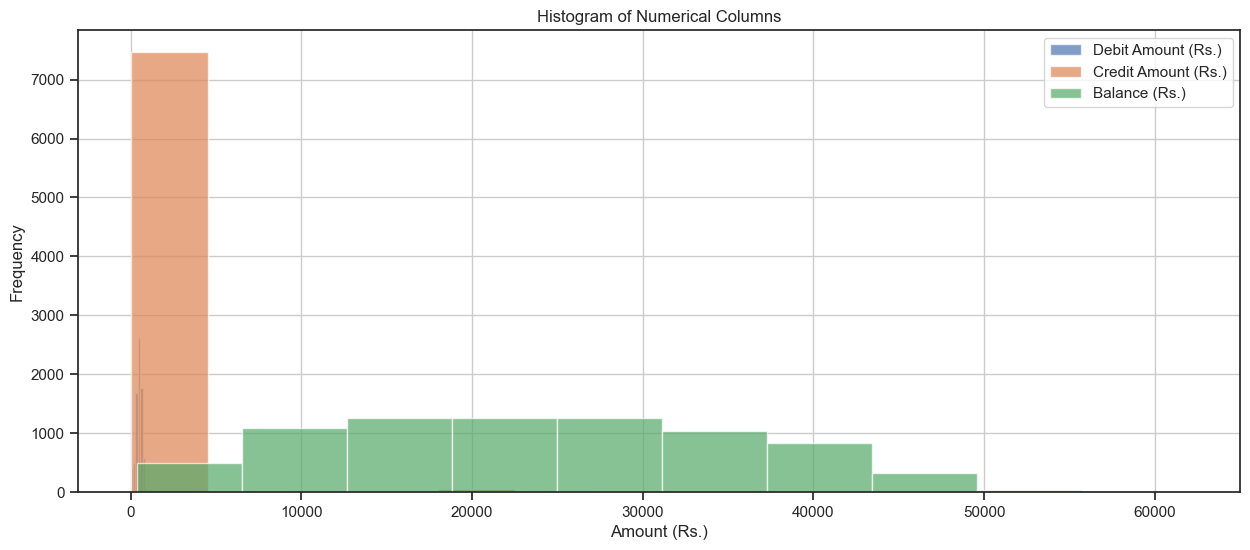

In [178]:
# List of numerical columns
numerical = ['Debit Amount (Rs.)', 'Credit Amount (Rs.)', 'Balance (Rs.)']

# Create histograms
plt.figure(figsize=(15, 6))
for col in numerical:
    plt.hist(df[col], bins=10, alpha=0.7, label=col)

plt.title('Histogram of Numerical Columns')
plt.xlabel('Amount (Rs.)')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()

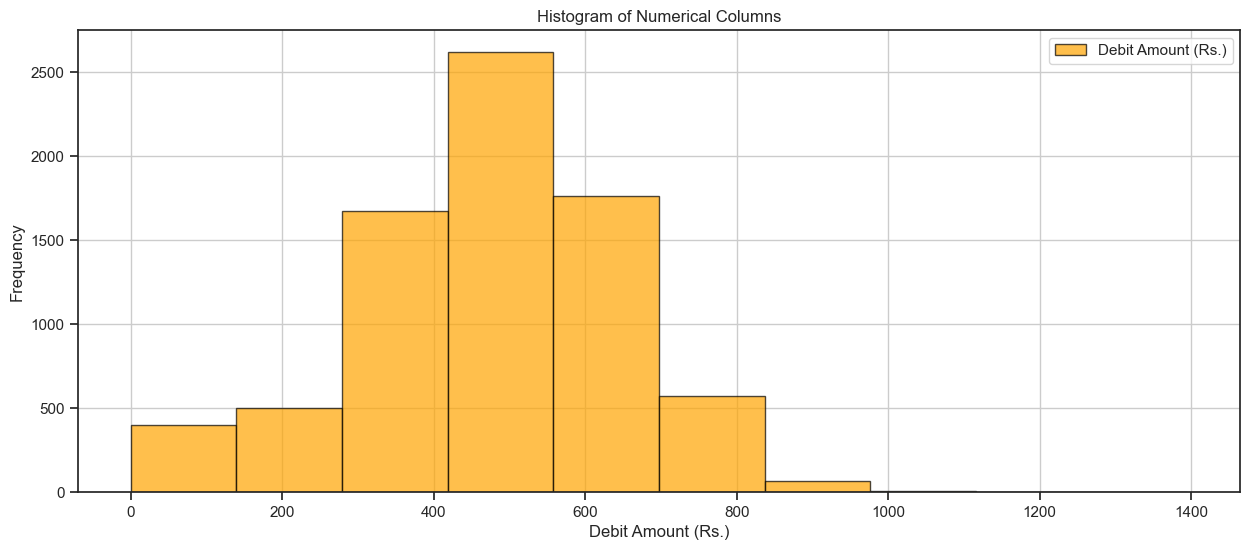

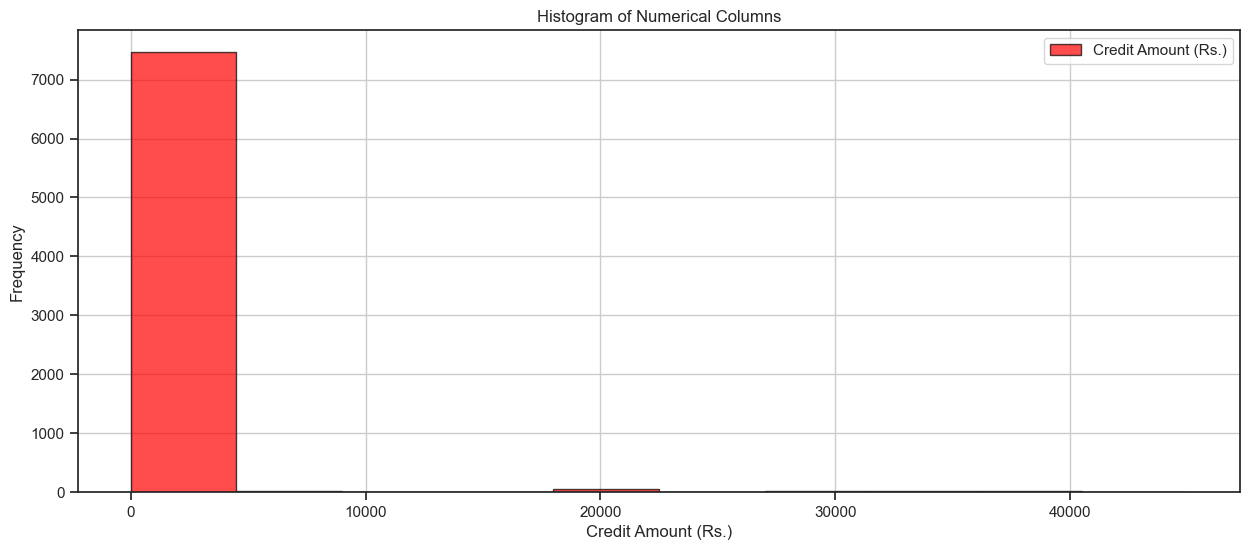

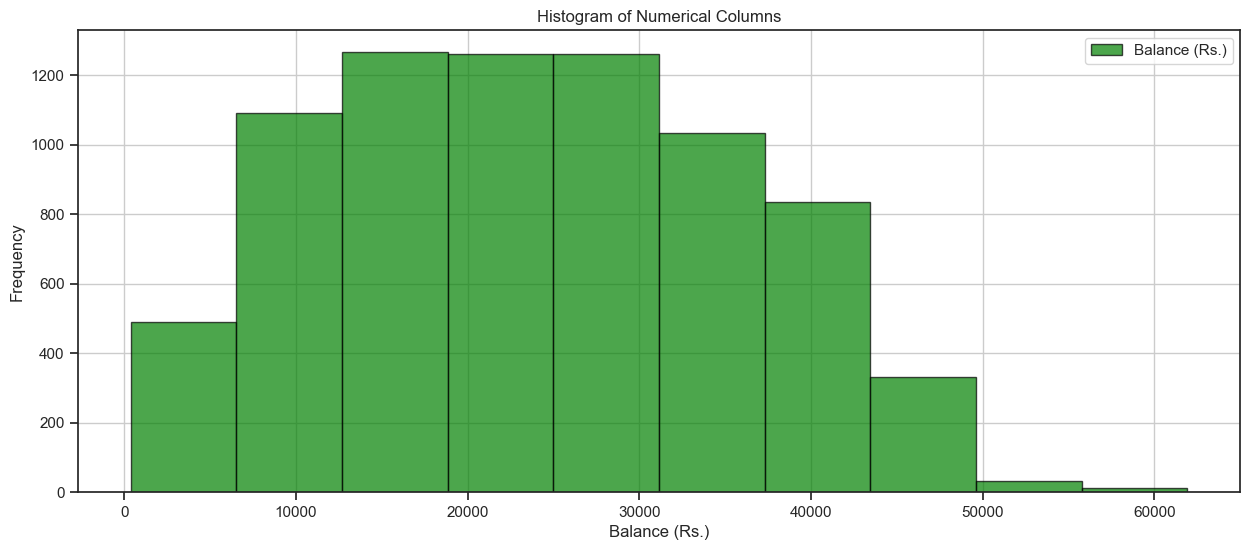

In [179]:
# List of numerical columns
numerical = ['Debit Amount (Rs.)', 'Credit Amount (Rs.)', 'Balance (Rs.)']
color = ['orange', 'red', 'green']

# Create histograms

for col,j in zip(numerical,color):
    plt.figure(figsize=(15, 6))
    plt.hist(df[col], bins=10, alpha=0.7, label=col, color=j, edgecolor='black')

    plt.title('Histogram of Numerical Columns')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.legend()
    plt.grid(True)
    plt.show()

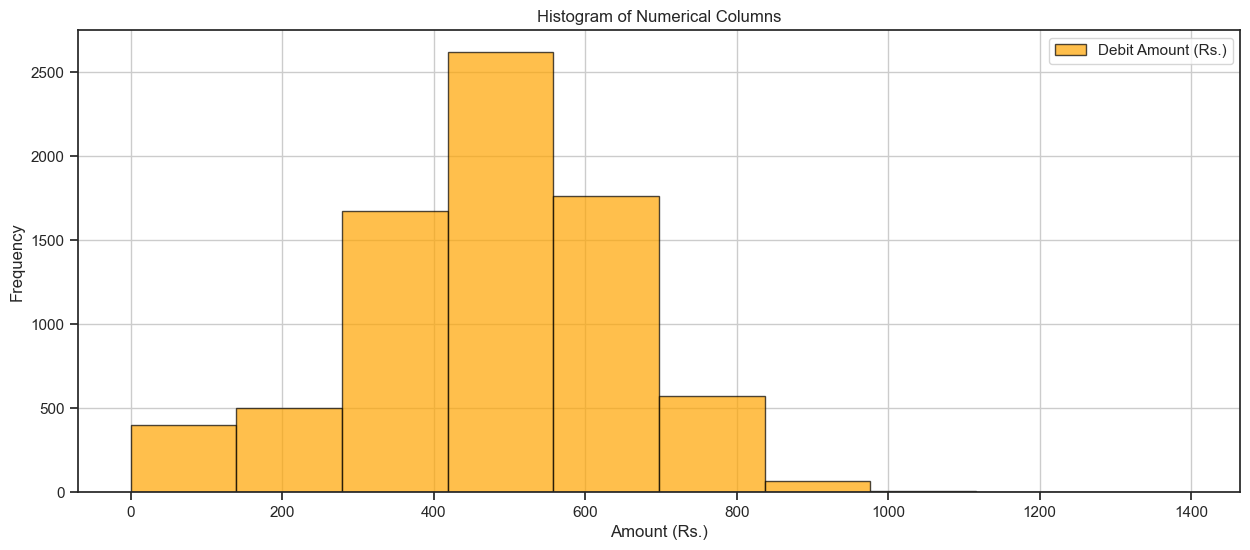

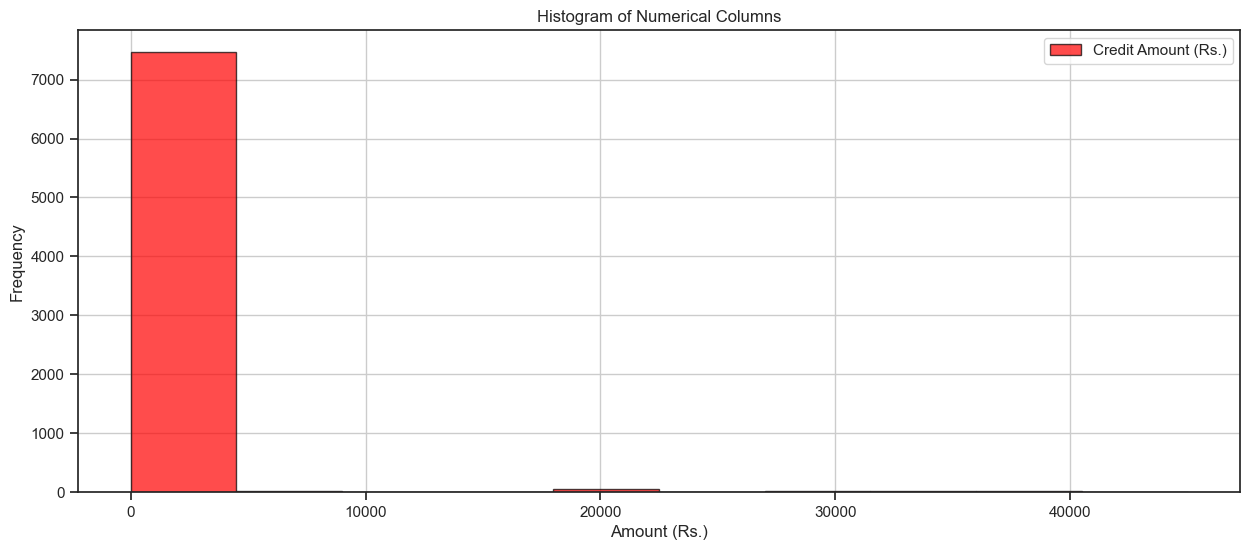

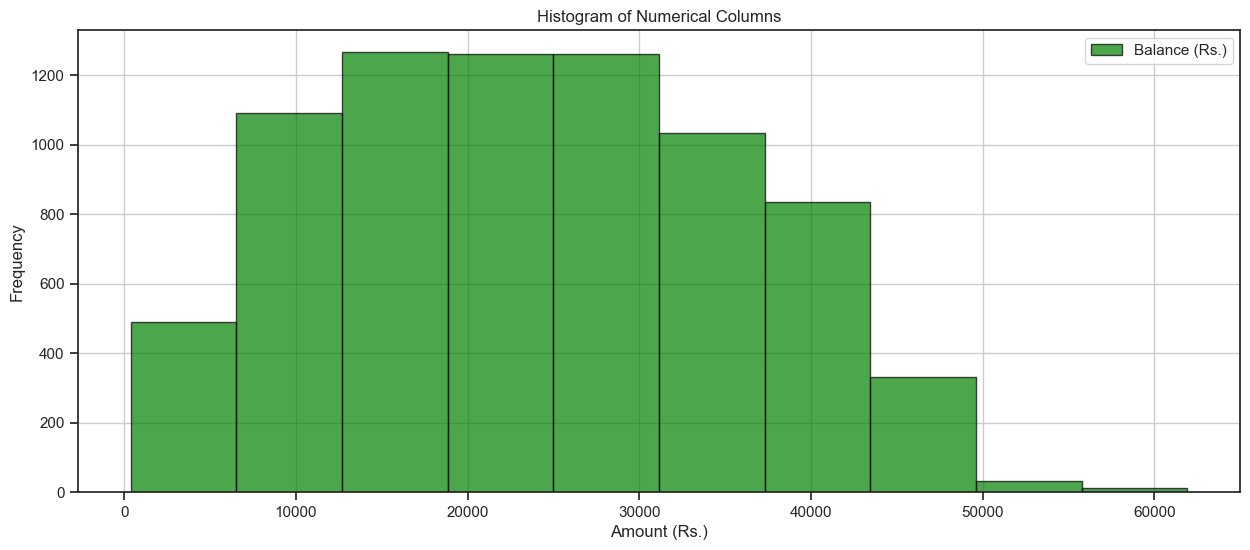

In [180]:
# List of numerical columns
numerical = ['Debit Amount (Rs.)', 'Credit Amount (Rs.)', 'Balance (Rs.)']
color = ['orange', 'red', 'green']

# Create histograms

for col,j in zip(numerical,color):
    plt.figure(figsize=(15, 6))
    plt.hist(df[col], bins=10,alpha=0.7, label=col, color=j, edgecolor='black')

    plt.title('Histogram of Numerical Columns')
    plt.xlabel('Amount (Rs.)')
    plt.ylabel('Frequency')
    plt.legend()
    plt.grid(True)
    plt.show()

# Boxplot

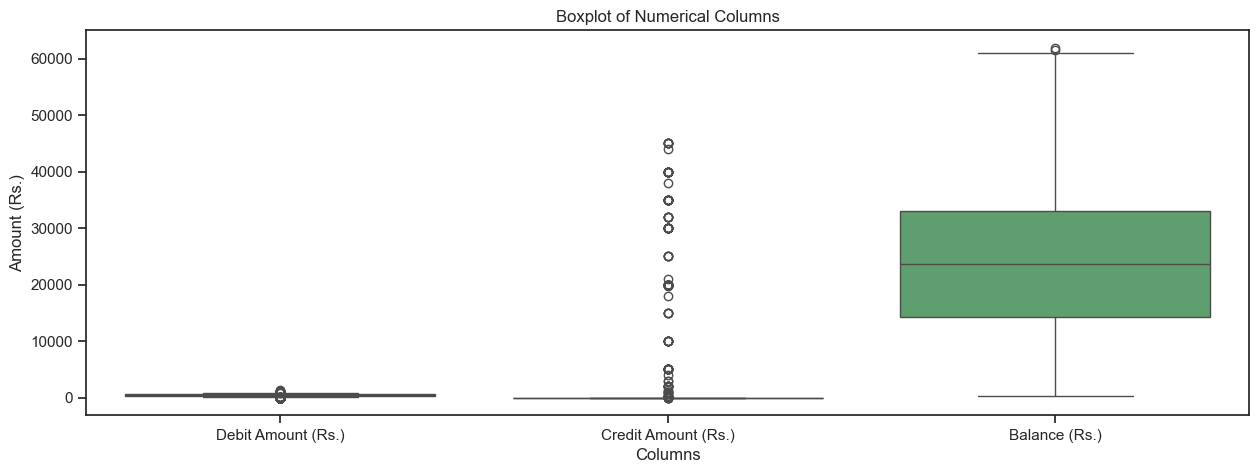

In [181]:
# List of numerical columns
numerical = ['Debit Amount (Rs.)', 'Credit Amount (Rs.)', 'Balance (Rs.)']

# Create boxplots
plt.figure(figsize=(15, 5))
sns.boxplot(data=df[numerical])
plt.title('Boxplot of Numerical Columns')
plt.ylabel('Amount (Rs.)')
plt.xlabel('Columns')
plt.xticks() # Rotate x-axis labels for better visibility
plt.show()

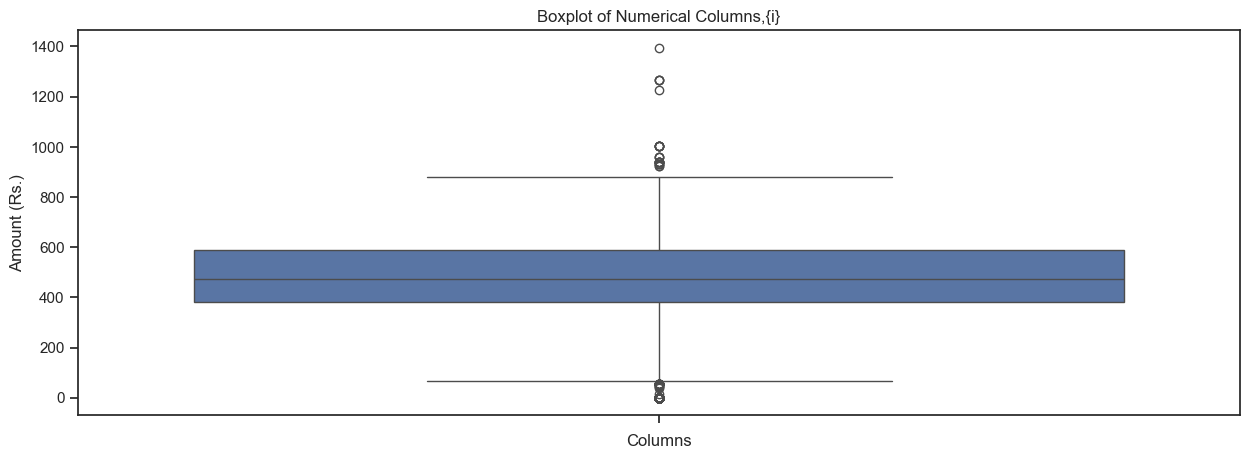

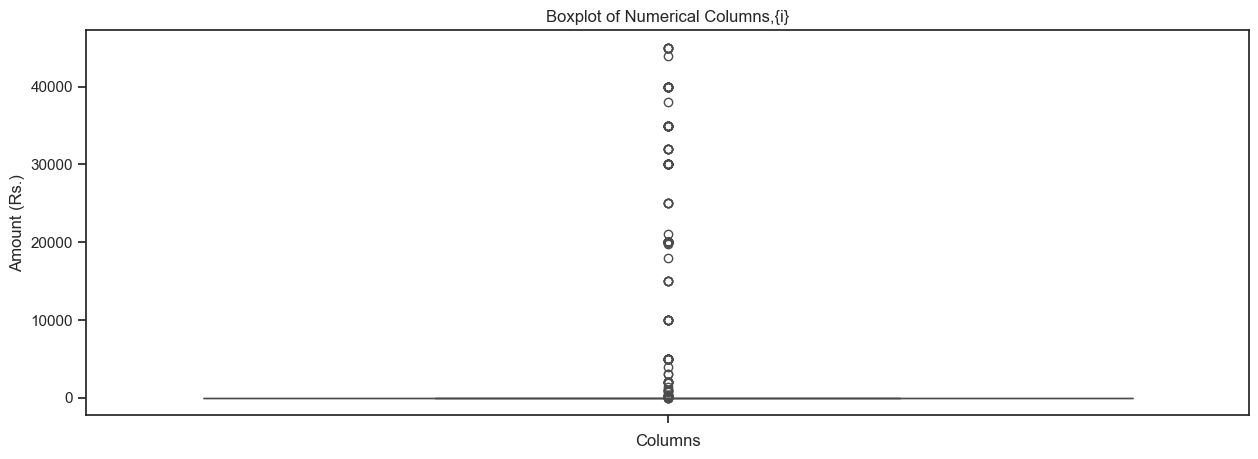

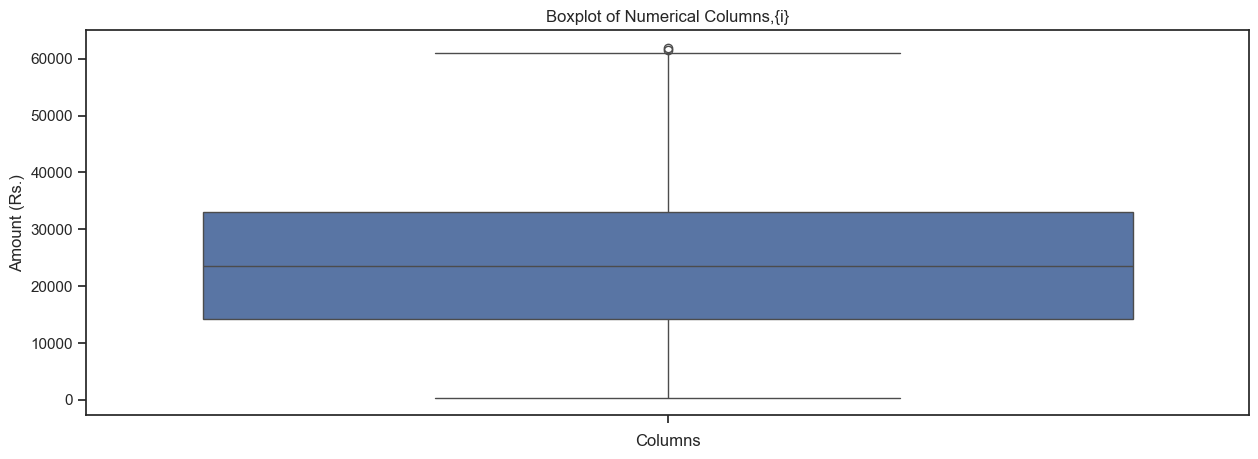

In [182]:
for i in numerical:
    # Create boxplots
    plt.figure(figsize=(15, 5))
    sns.boxplot(data=df[i])
    plt.title('Boxplot of Numerical Columns,{i}')
    plt.ylabel('Amount (Rs.)')
    plt.xlabel('Columns')
    plt.xticks() # Rotate x-axis labels for better visibility
    plt.show()

# Kdeplot

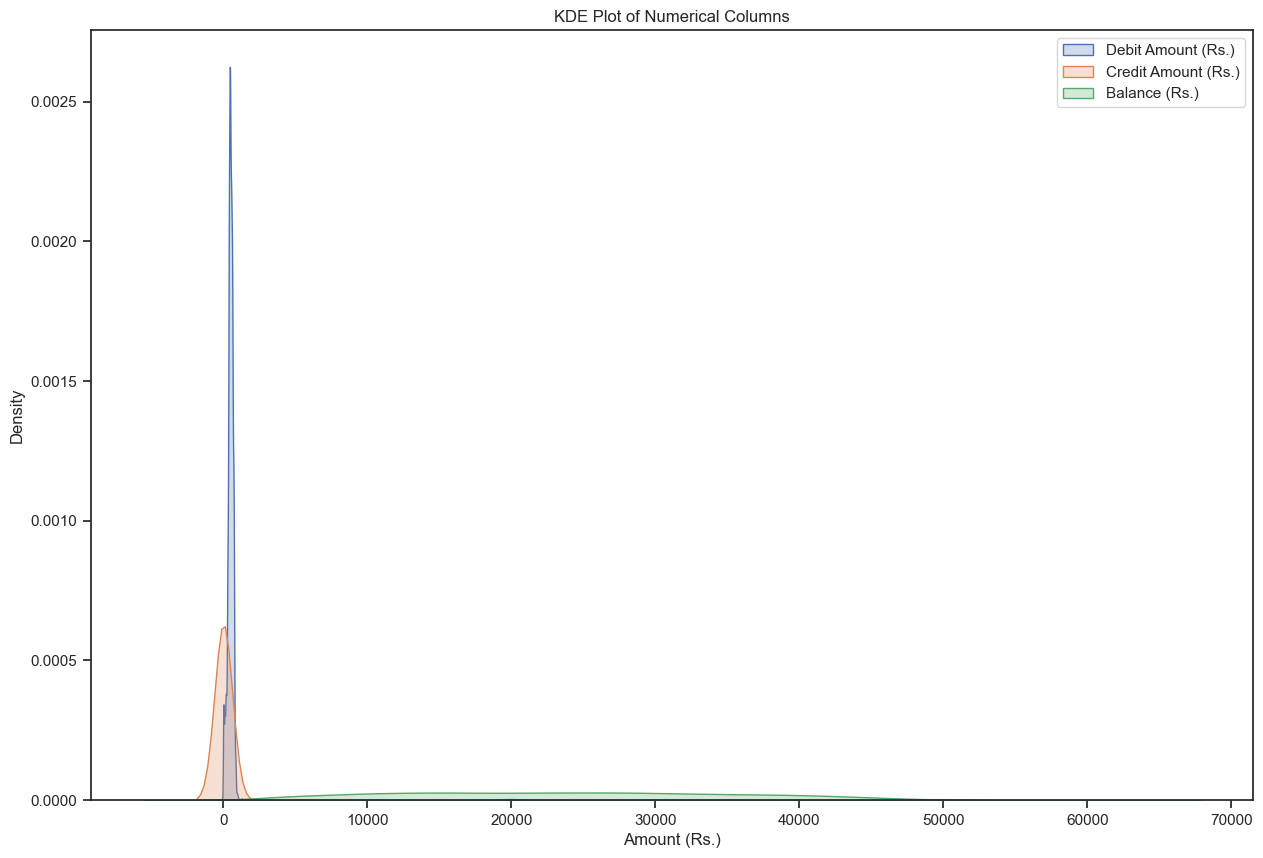

In [183]:
# List of numerical columns
numerical = ['Debit Amount (Rs.)', 'Credit Amount (Rs.)', 'Balance (Rs.)']

# Create kdeplots
plt.figure(figsize=(15, 10))
for col in numerical:
    sns.kdeplot(data=df[col], label=col, fill=True, common_norm=False)
plt.title('KDE Plot of Numerical Columns')
plt.xlabel('Amount (Rs.)')
plt.ylabel('Density')
plt.legend()
plt.show()

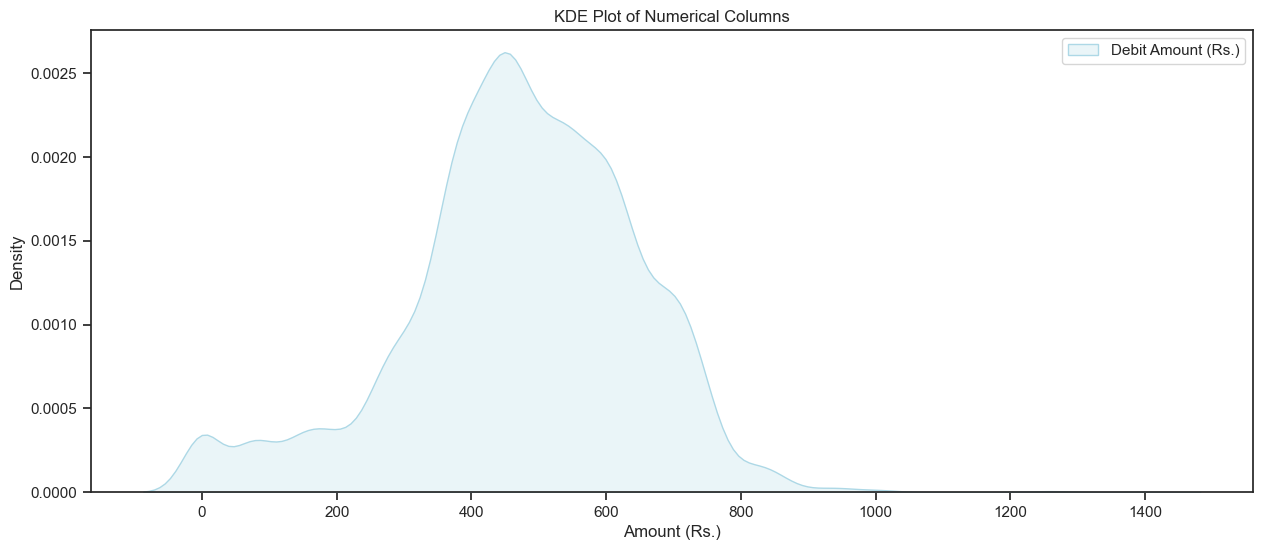

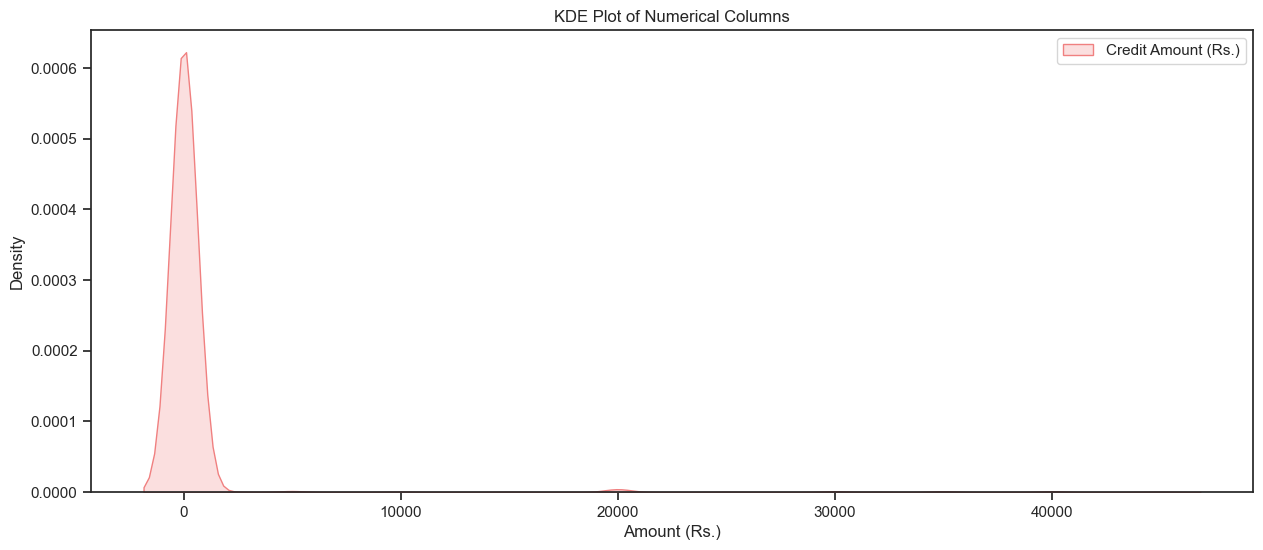

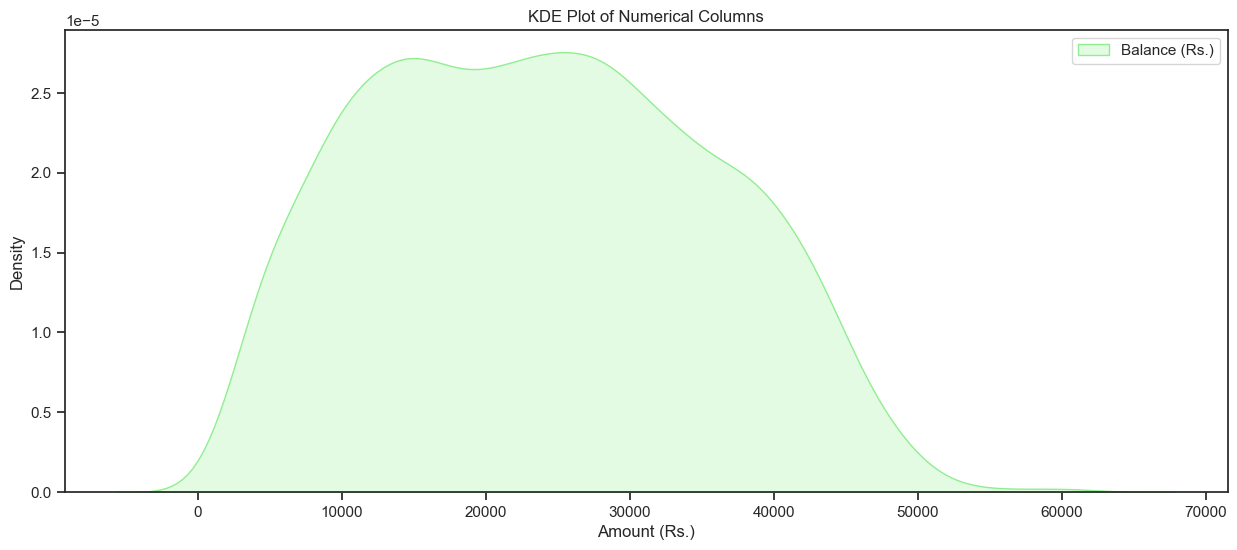

In [184]:
# List of numerical columns
numerical = ['Debit Amount (Rs.)', 'Credit Amount (Rs.)', 'Balance (Rs.)']
color = ['lightblue', 'lightcoral', 'lightgreen']

# Create kdeplots
#plt.figure(figsize=(15, 6))
for col,j in zip(numerical,color):
    plt.figure(figsize=(15, 6))
    sns.kdeplot(data=df[col], label=col,fill=True, common_norm=False,color=j)
    
    plt.title('KDE Plot of Numerical Columns')
    plt.xlabel('Amount (Rs.)')
    plt.ylabel('Density')
    plt.legend()
    plt.show()

# Bivariate Analysis

In [185]:
bi_var=[('Debit Amount (Rs.)', 'Credit Amount (Rs.)'),
     ('Debit Amount (Rs.)', 'Balance (Rs.)'), 
     ('Credit Amount (Rs.)', 'Balance (Rs.)') ]

# Scatter Plot

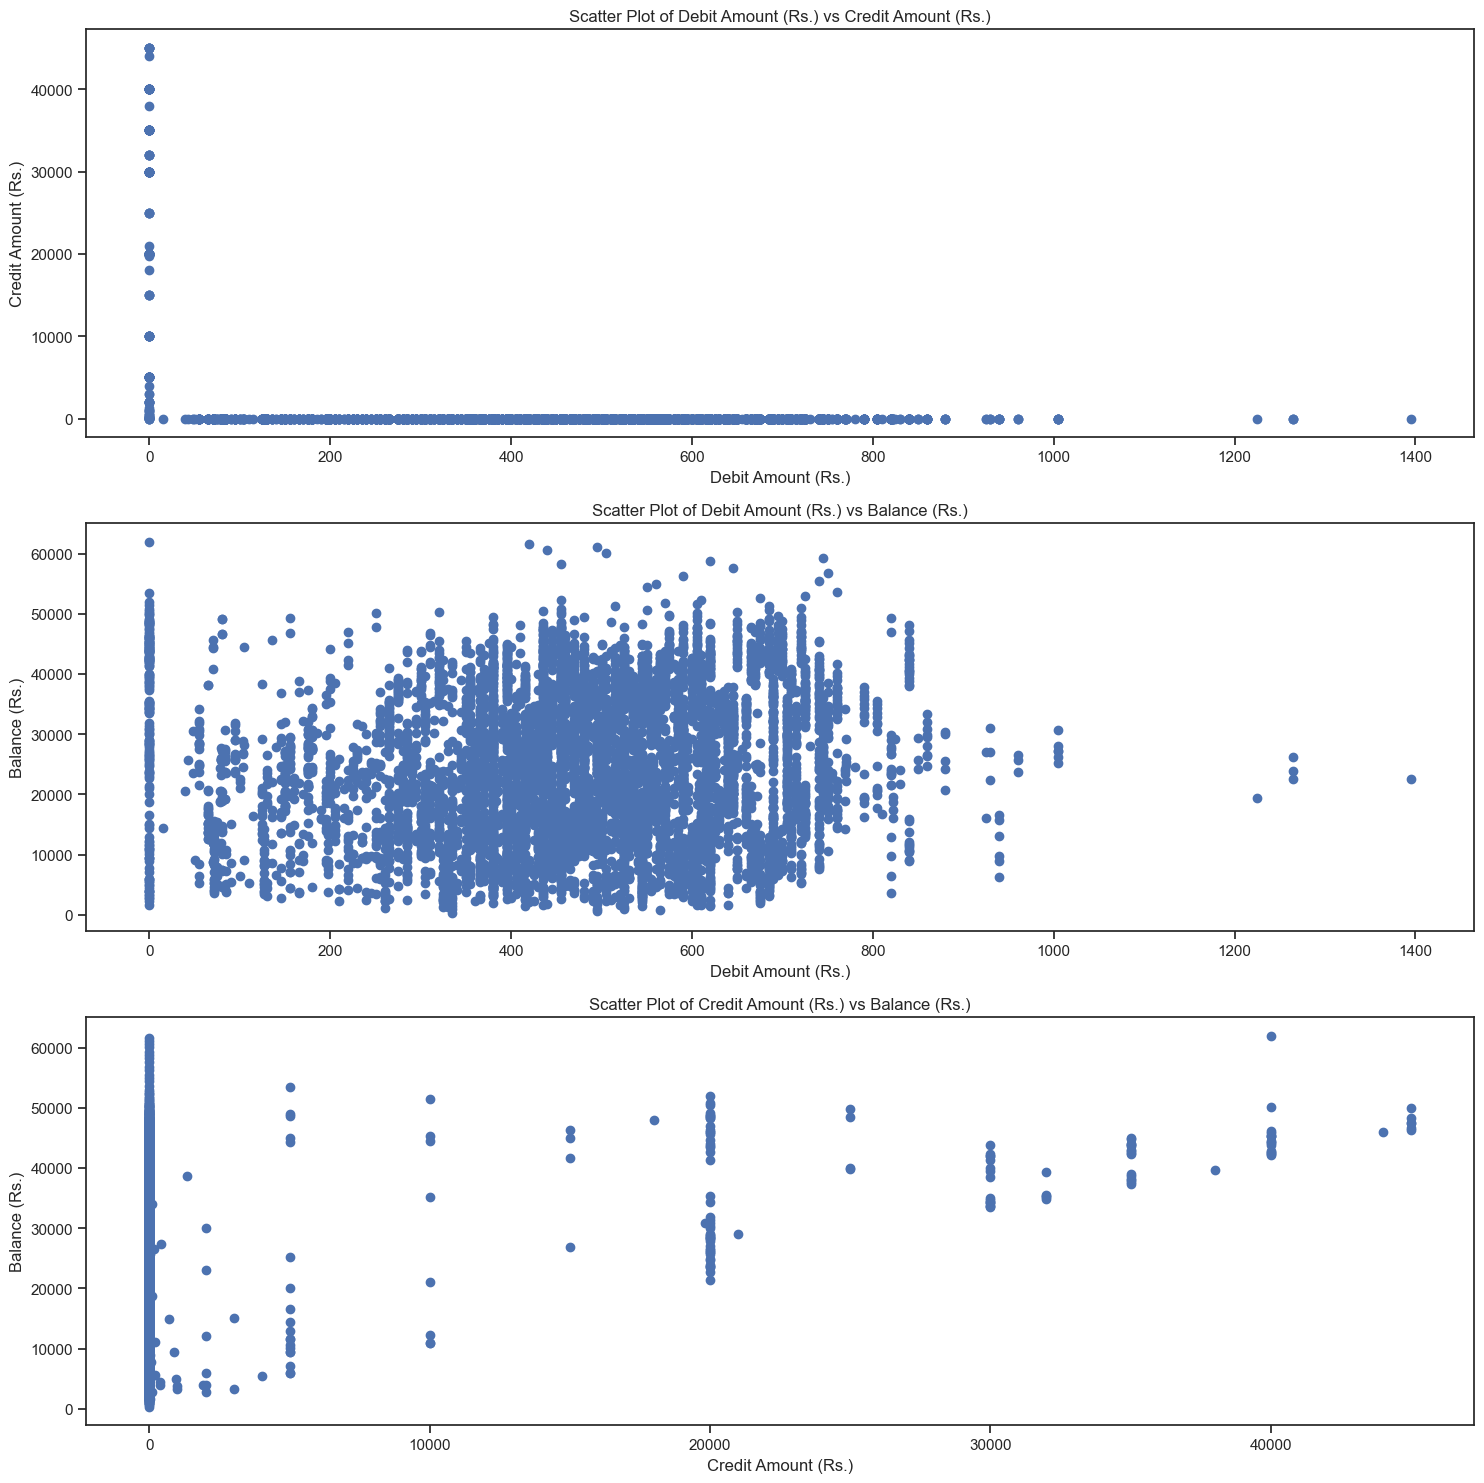

In [186]:
# Create scatter plots
plt.figure(figsize=(15, 15))

for i, pair in enumerate(bi_var, 1):
    plt.subplot(3, 1, i)
    plt.scatter(df[pair[0]], df[pair[1]])
    plt.xlabel(pair[0])
    plt.ylabel(pair[1])
    plt.title(f"Scatter Plot of {pair[0]} vs {pair[1]}")

plt.tight_layout()
plt.show()

# Pair Plot

<Figure size 1500x1500 with 0 Axes>

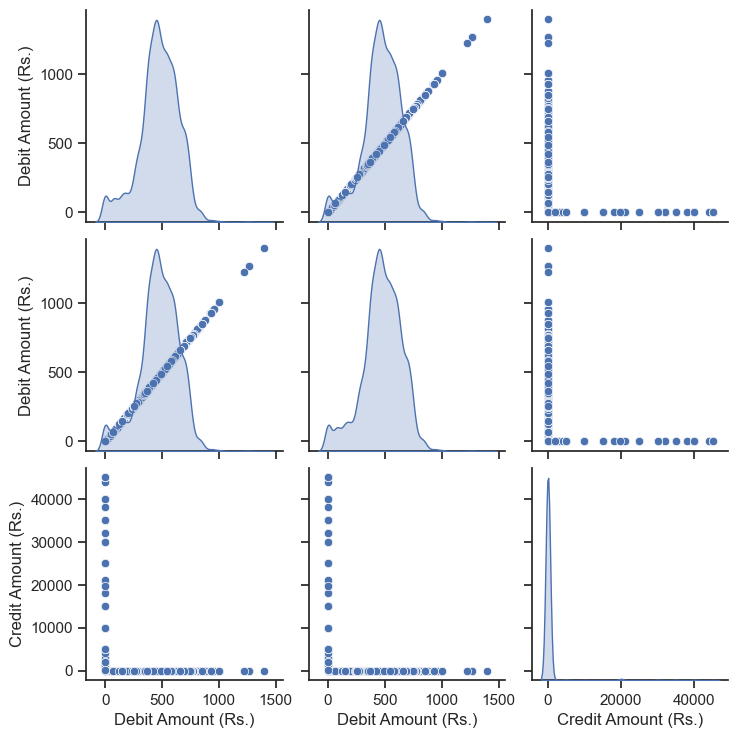

In [187]:
# Create pair plots
sns.set(style="ticks")
plt.figure(figsize=(15, 15))
sns.pairplot(df, vars=[pair[0] for pair in bi_var], kind='scatter', diag_kind='kde', hue_order=[pair[1] for pair in bi_var])
plt.show()

# Box Plot or Violin Plot

# Box Plot

In [188]:
in_put = [('Debit Amount (Rs.)', 'Credit Amount (Rs.)')]
out_put = ['Balance (Rs.)']

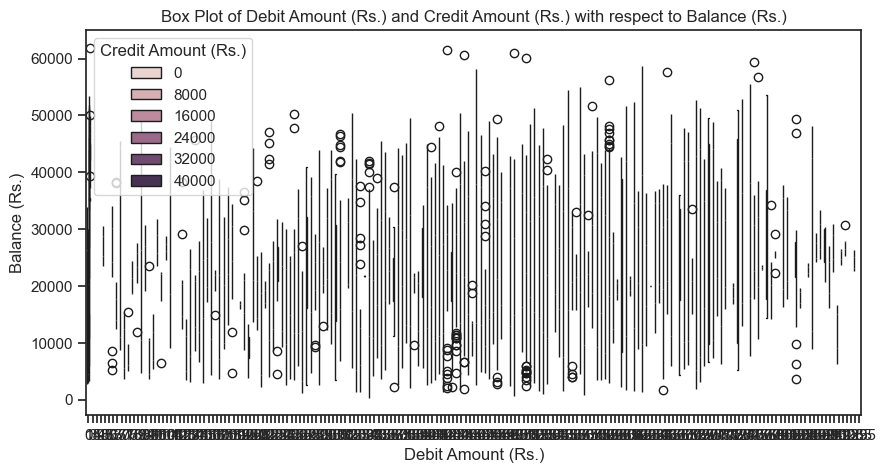

In [189]:
# Extracting input and output variable names
x, y = in_put[0]
hue = out_put[0]

# Create a box plot
plt.figure(figsize=(10, 5))
sns.boxplot(x=x, y=hue, data=df, hue=y)
plt.title(f'Box Plot of {x} and {y} with respect to {hue}')
plt.xlabel(x)
plt.ylabel(hue)
plt.legend(title=y)
plt.show()

# Violin Plot

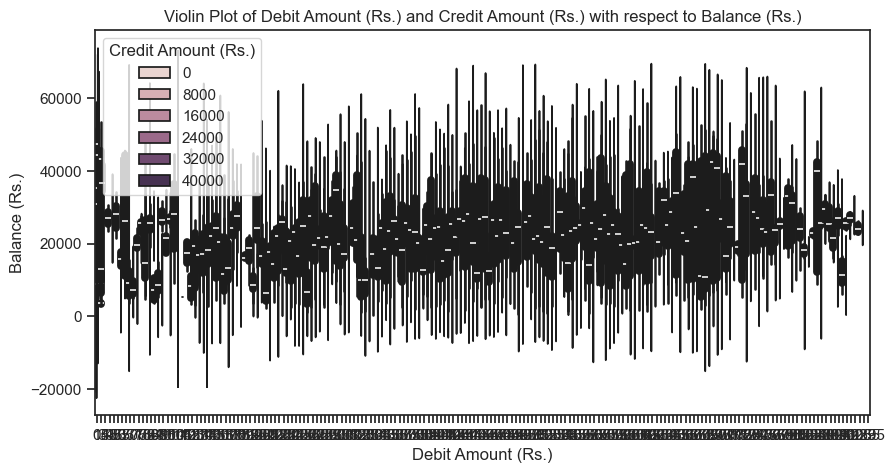

In [190]:
# Create a violin plot
plt.figure(figsize=(10, 5))
sns.violinplot(x=x, y=hue, data=df, hue=y, split=True)
plt.title(f'Violin Plot of {x} and {y} with respect to {hue}')
plt.xlabel(x)
plt.ylabel(hue)
plt.legend(title=y)
plt.show()

# Bar plot

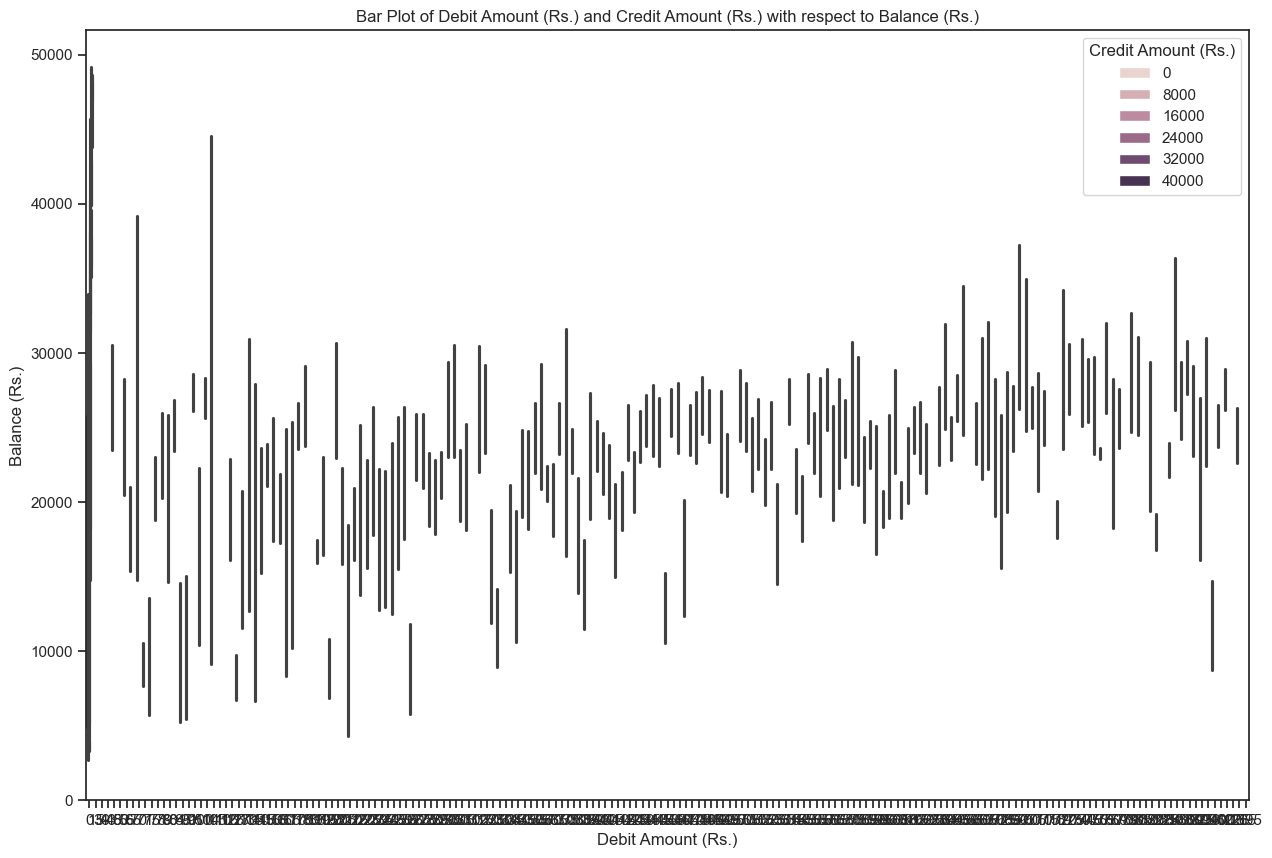

In [191]:
# Extracting input and output variable names
x, y = in_put[0]
hue = out_put[0]

# Create a bar plot
plt.figure(figsize=(15, 10))
sns.barplot(x=x, y=hue, data=df, hue=y)
plt.title(f'Bar Plot of {x} and {y} with respect to {hue}')
plt.xlabel(x)
plt.ylabel(hue)
plt.legend(title=y)
plt.show()

# Count plot

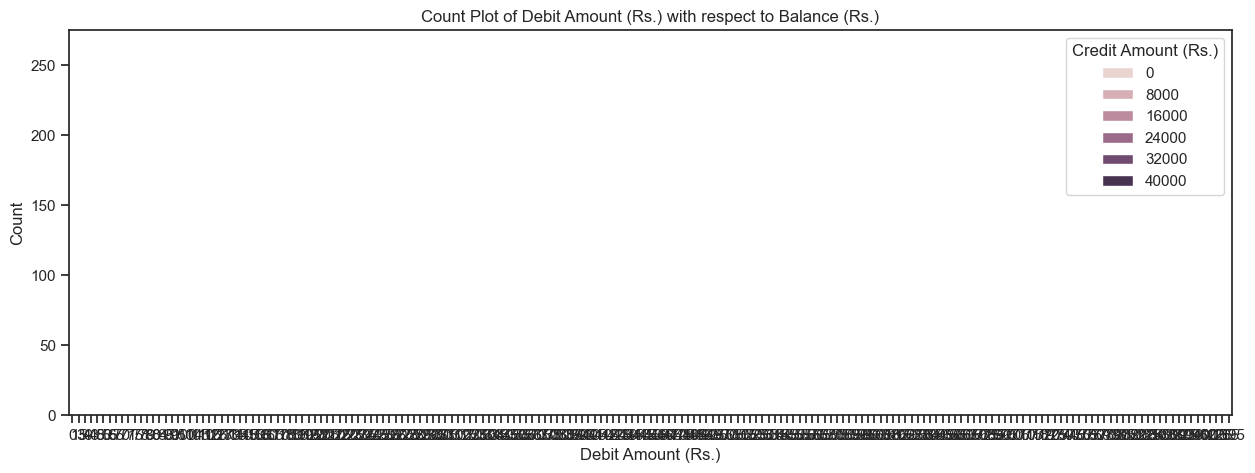

In [192]:
# Create a count plot
plt.figure(figsize=(15, 5))
sns.countplot(x=x, data=df, hue=y)
plt.title(f'Count Plot of {x} with respect to {hue}')
plt.xlabel(x)
plt.ylabel('Count')
plt.legend(title=y)
plt.show()

# `Categorical Variable Analysis`

In [193]:
cat_col=['Plaza Name', 'District', 'State']

# `Bar Plot for Categorical Variables`

In [194]:
import seaborn as sns

def plot_cat(column_name):
    data_1 = df[column_name].value_counts()
    print(data_1)
    color = sns.color_palette("pastel",len(data_1))
    plt.figure(figsize=(16,8))
    data_1.plot(kind="bar",color=color)
    plt.show()

Plaza Name
Krishnagiri Plaza             185
L And T Krishnagiri Thopur    184
Tharamangalam                 173
Choundha                      169
Mehra                         168
                             ... 
Pipalaz                         1
Gegal                           1
Nanguneri                       1
Tatiawas                        1
Madina                          1
Name: count, Length: 242, dtype: int64


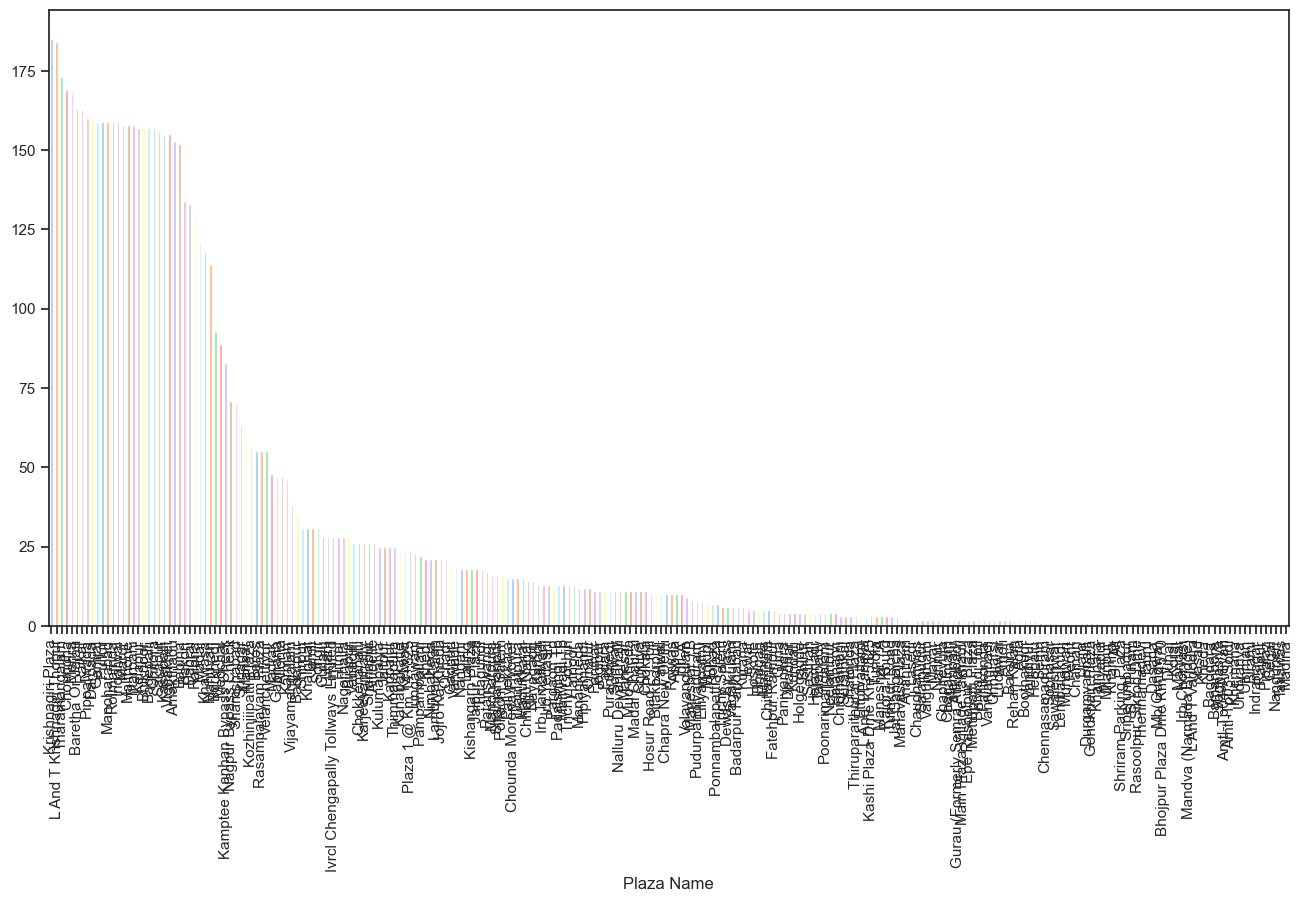

District
Adilabad        478
Mahabubnagar    478
Sagar           473
Nizamabad       316
Anantapuram     313
               ... 
Ahmedabad         1
Morbi             1
Aniyari           1
Soldi             1
Kanpur Nagar      1
Name: count, Length: 148, dtype: int64


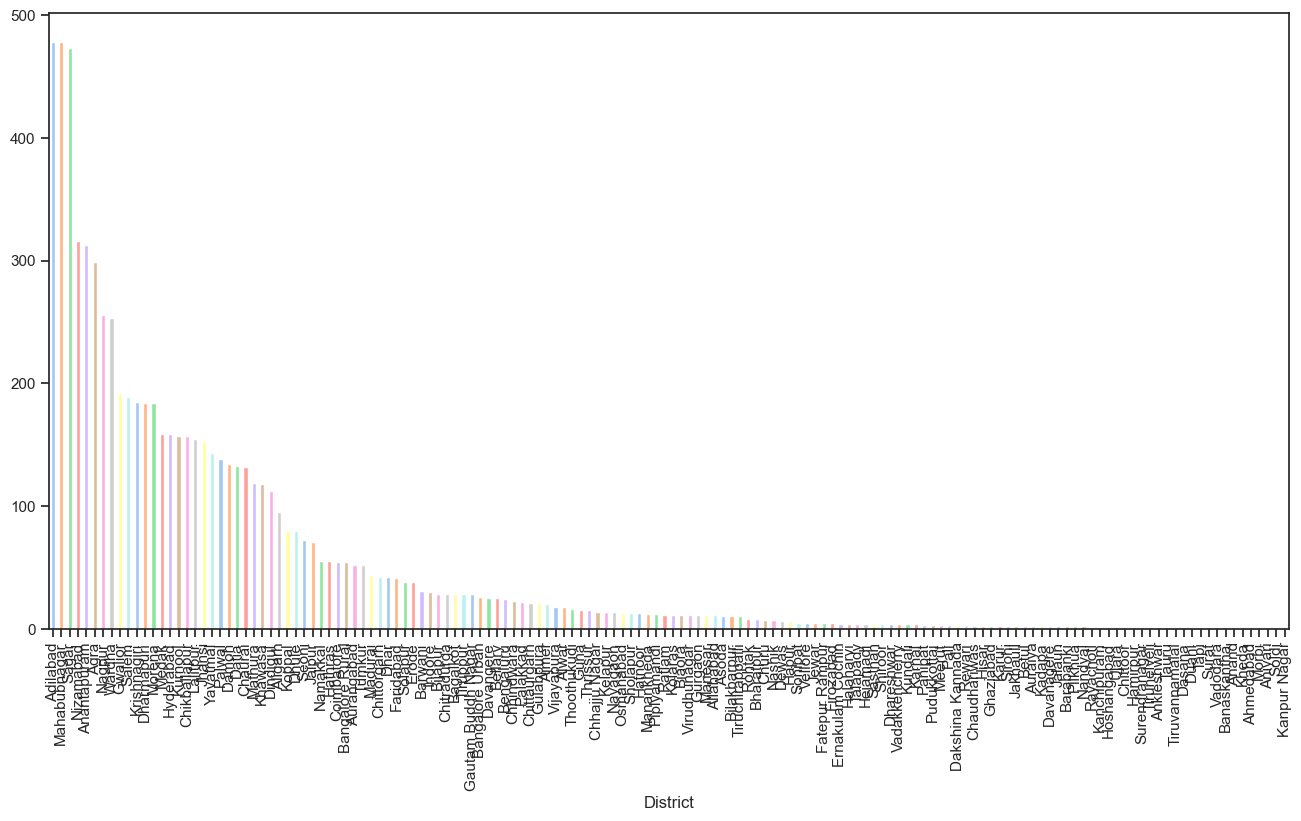

State
Madhya Pradesh    1671
Telangana         1590
Uttar Pradesh      952
Tamil Nadu         939
Maharashtra        882
Karnataka          570
Andhra Pradesh     480
Haryana            259
Rajasthan          213
Kerala              45
Gujarat             12
Name: count, dtype: int64


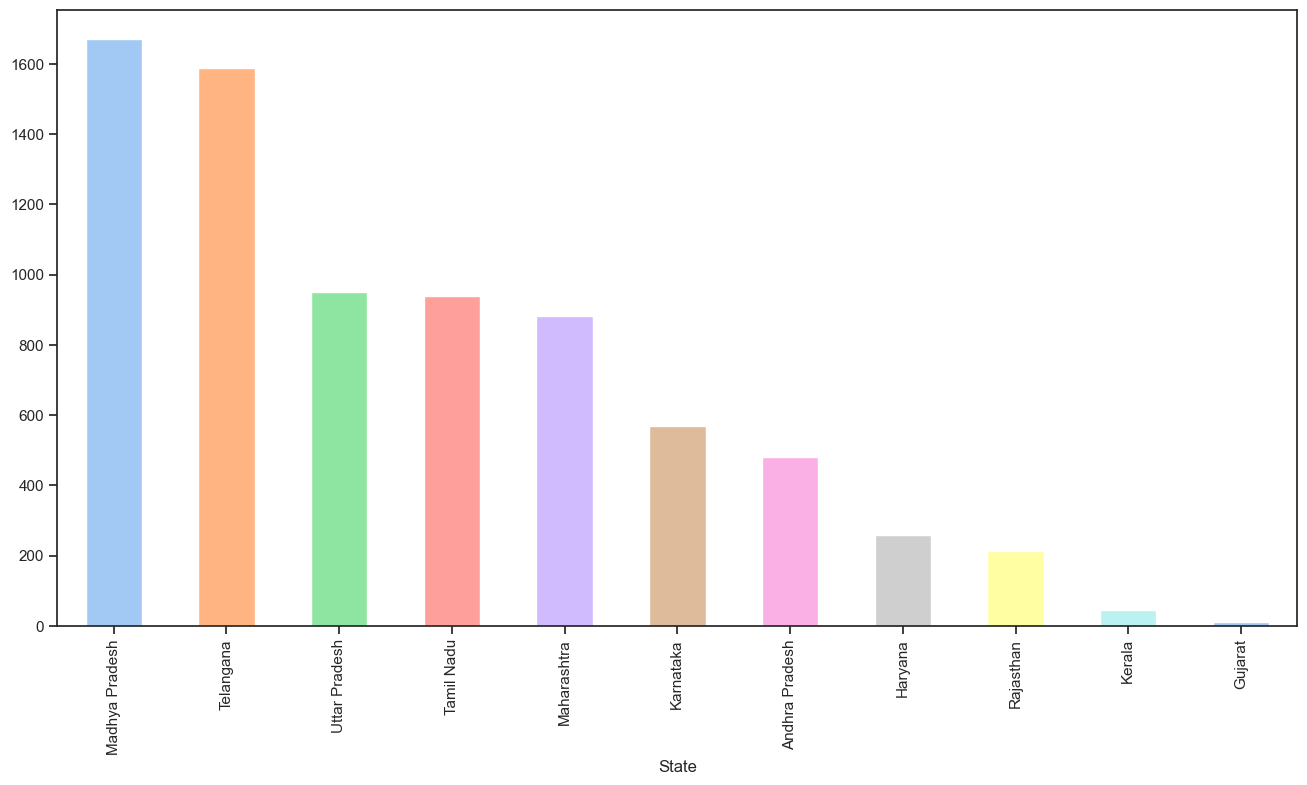

In [195]:
for i in cat_col:
     plot_cat(i)

# `Stacked Bar Chart`

In [196]:
cat_col = [ 'District', 'State']

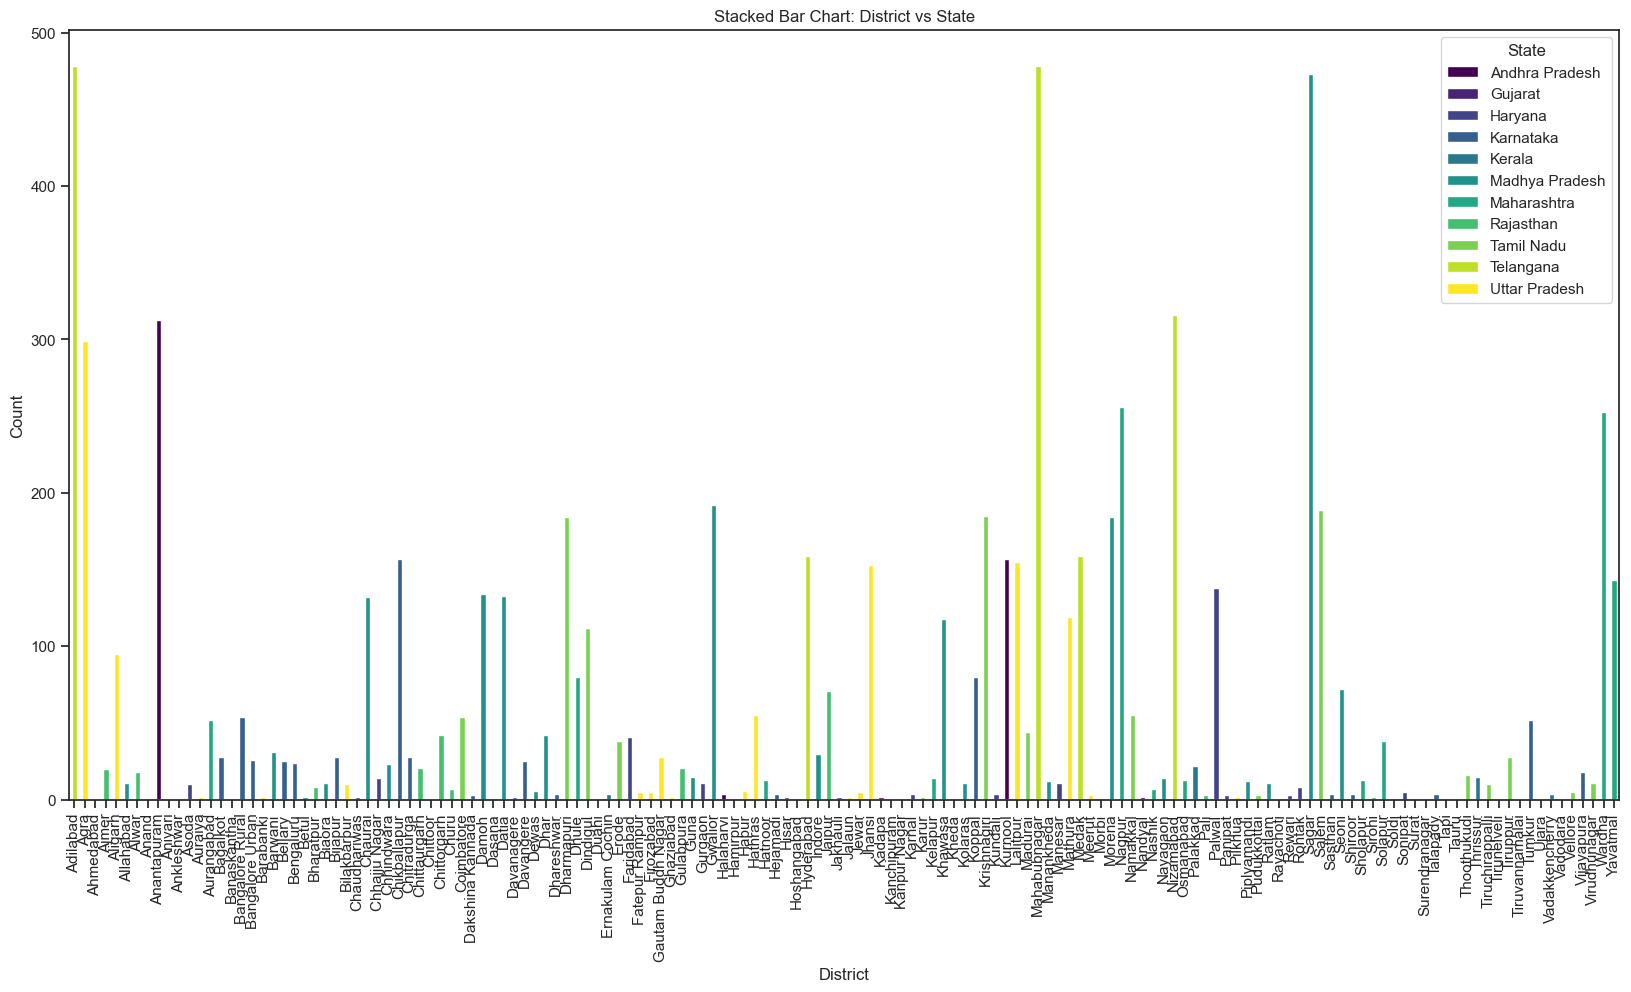

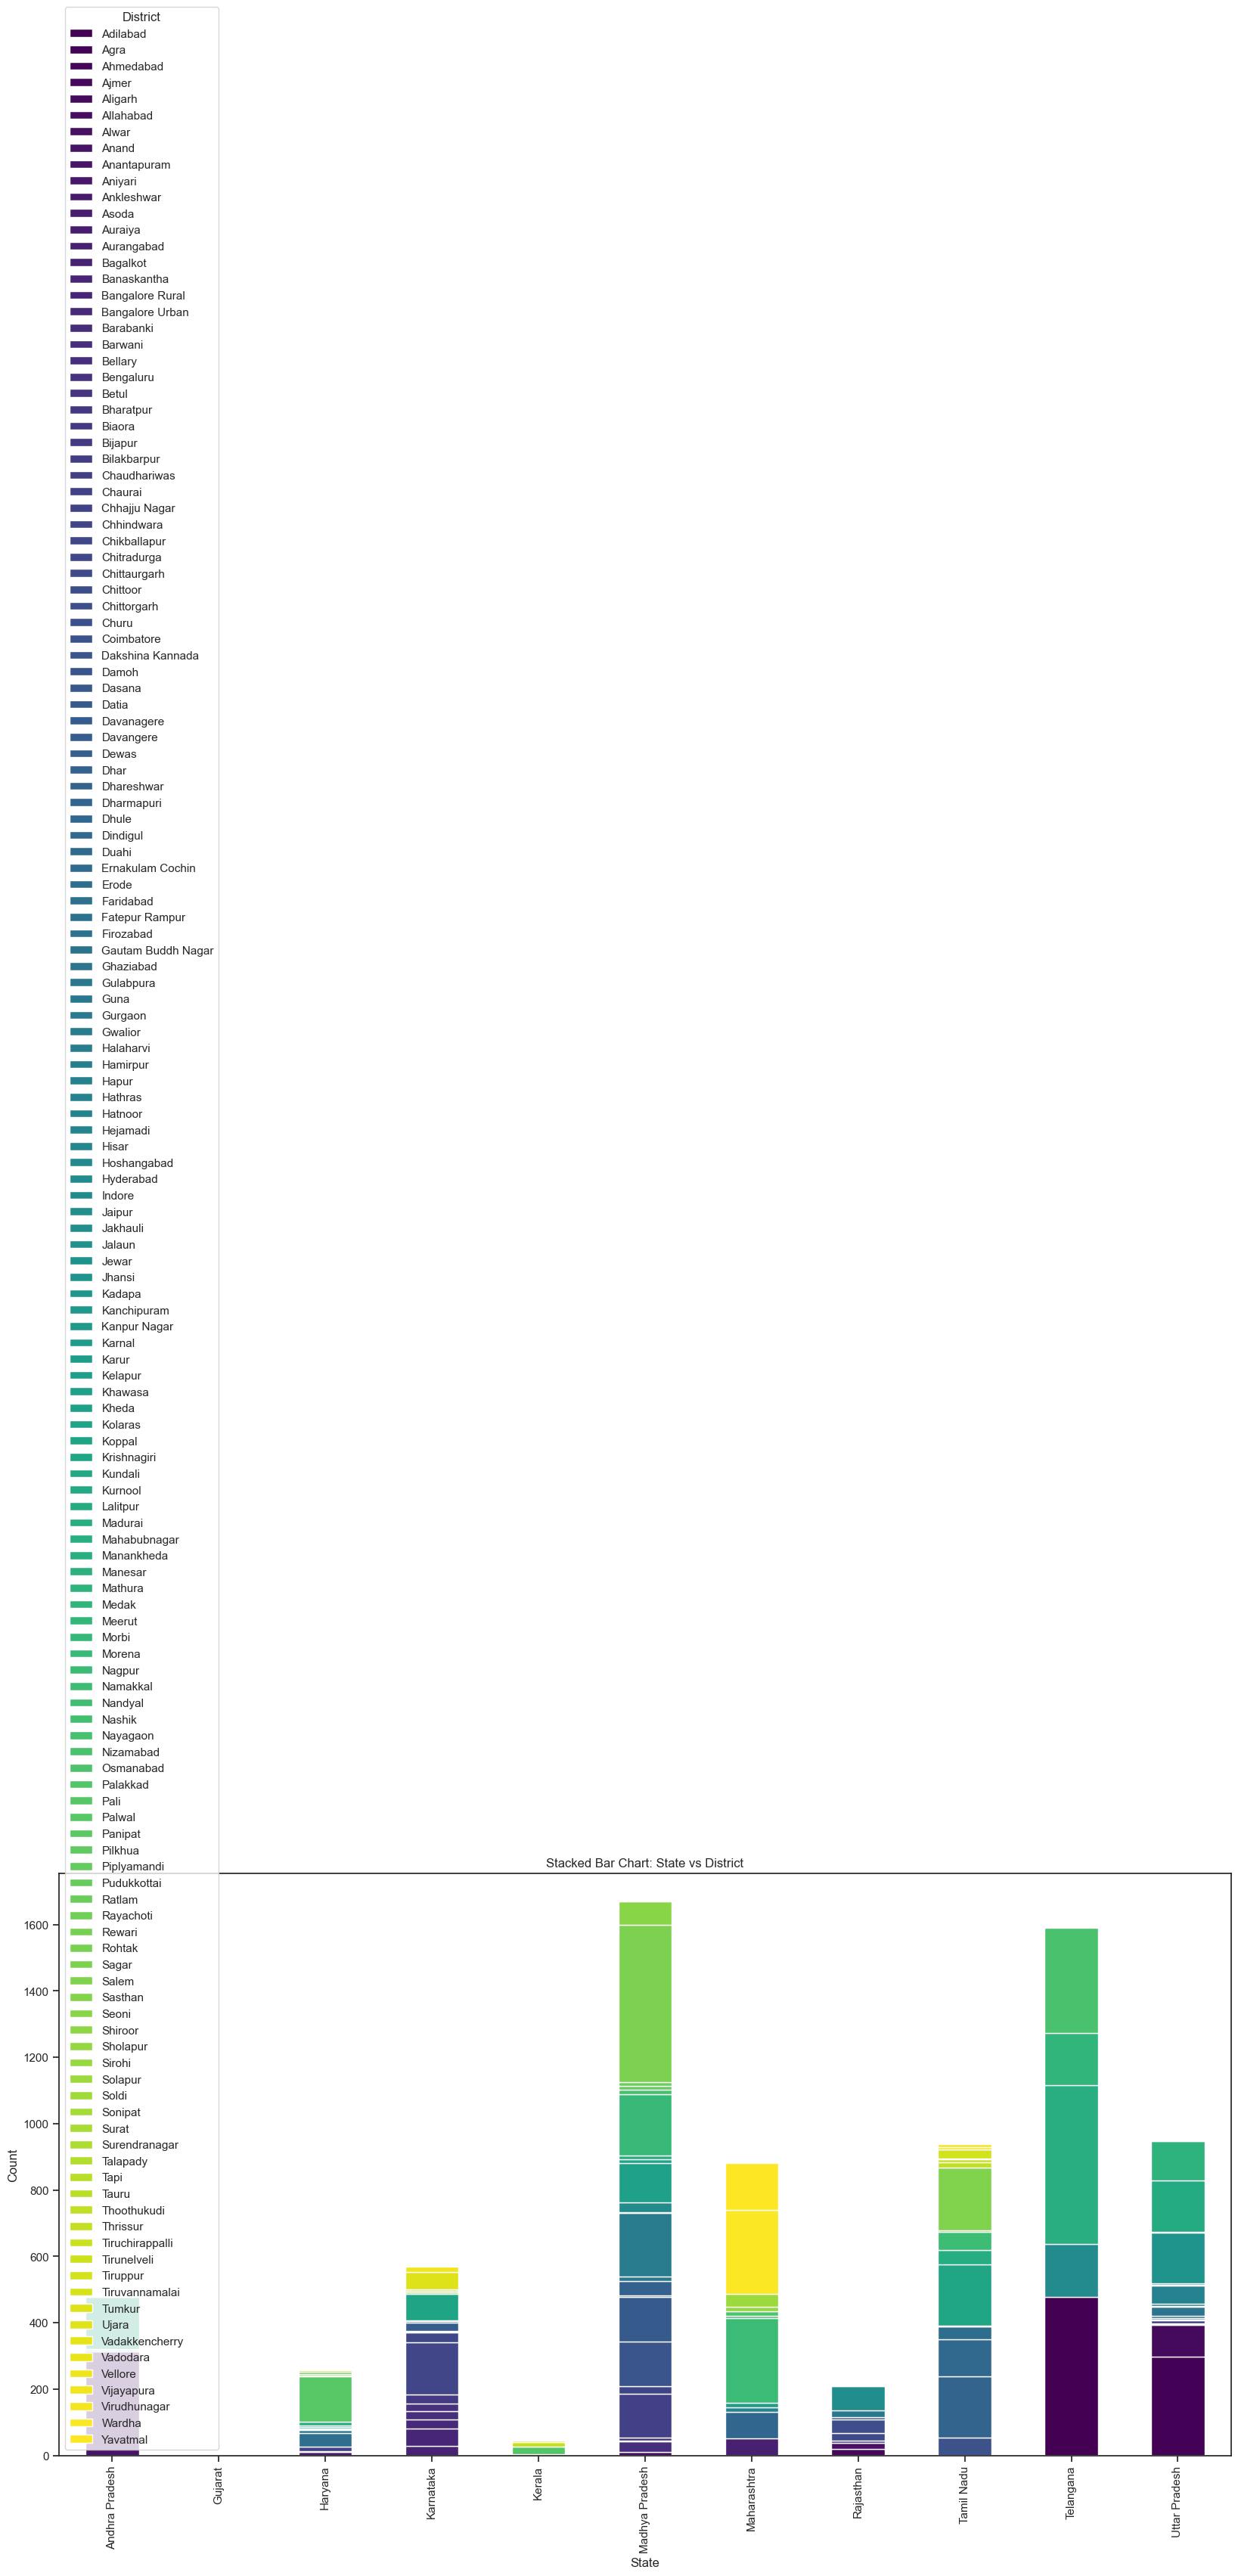

In [197]:
# Create a stacked bar chart for each pair of categorical features
for feature1 in cat_col:
    for feature2 in cat_col:
        if feature1 != feature2:
            # Create a cross-tabulation for the pair of categorical features
            cross_tab = pd.crosstab(df[feature1], df[feature2])
            
            # Plot a stacked bar chart
            cross_tab.plot(kind='bar', stacked=True, colormap='viridis',figsize=(20, 10))
            
            plt.title(f'Stacked Bar Chart: {feature1} vs {feature2}')
            plt.xlabel(feature1)
            plt.ylabel('Count')
            plt.legend(title=feature2)
            
            plt.show()

# `Splitting the data into numerical and categorical variables`

In [198]:
numeric_var_names=[key for key in dict(df.dtypes) if dict(df.dtypes)[key] in ['float64', 'int64', 'float32', 'int32']]
cat_var_names=[key for key in dict(df.dtypes) if dict(df.dtypes)[key] in ['object', 'O','bool']]

In [199]:
numeric_var_names

['Debit Amount (Rs.)', 'Credit Amount (Rs.)', 'Balance (Rs.)']

In [200]:
cat_var_names


['Transaction Type', 'Plaza Name', 'District', 'State']

In [201]:
data_num=df[numeric_var_names]
data_num.head(5)

,Debit Amount (Rs.),Credit Amount (Rs.),Balance (Rs.)
0,330,0,3620.73
1,620,0,3950.73
2,420,0,4570.73
3,420,0,4990.73
4,620,0,5410.73


# `Data Audit Report`

In [202]:
# Creating Data audit Report
def var_summary(x):
    return pd.Series([x.count(), x.isnull().sum(), x.sum(),
                       x.mean(), x.median(),  x.std(), x.var(), x.std()/x.mean(),
                         x.min(), x.dropna().quantile(0.01), x.dropna().quantile(0.05),x.dropna().quantile(0.10),
                         x.dropna().quantile(0.25),x.dropna().quantile(0.50),x.dropna().quantile(0.75), x.dropna().quantile(0.90),
                         x.dropna().quantile(0.95), x.dropna().quantile(0.99),x.max()],
                  index=['N', 'NMISS', 'SUM', 'MEAN','MEDIAN', 'STD', 'VAR', 'CV','MIN',
                          'P1' , 'P5' ,'P10' ,'P25' ,'P50' ,'P75' ,'P90' ,'P95' ,'P99' ,'MAX'])

data_num.apply(var_summary).T

,N,NMISS,SUM,MEAN,MEDIAN,STD,VAR,CV,MIN,P1,P5,P10,P25,P50,P75,P90,P95,P99,MAX
Debit Amount (Rs.),7613.0,0.0,3.589221e+06,471.459477,475.00,173.488976,3.009842e+04,0.367983,0.00,0.00,127.000,260.000,380.00,475.00,590.00,690.00,725.00,829.40,1395.00
Credit Amount (Rs.),7613.0,0.0,3.597710e+06,472.574544,0.00,3697.185997,1.366918e+07,7.823498,0.00,0.00,0.000,0.000,0.00,0.00,0.00,0.00,0.00,20000.00,45000.00
Balance (Rs.),7613.0,0.0,1.821714e+08,23928.987918,23581.73,11792.487495,1.390628e+08,0.492812,366.73,2889.37,5703.788,8440.546,14259.73,23581.73,33036.73,40266.33,43410.13,48306.81,61921.73


# `Correlation`

In [203]:
corr_matrix = data_num.corr()
corr_matrix



,Debit Amount (Rs.),Credit Amount (Rs.),Balance (Rs.)
Debit Amount (Rs.),1.000000,-0.347399,0.079589
Credit Amount (Rs.),-0.347399,1.000000,0.165604
Balance (Rs.),0.079589,0.165604,1.000000


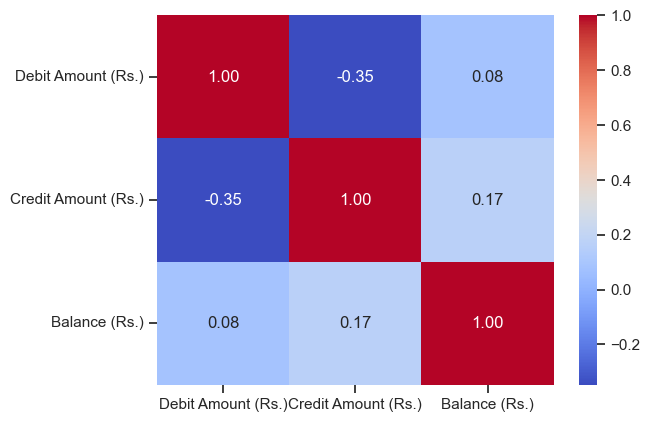

In [204]:
sns.heatmap(corr_matrix, annot=True,fmt='.2f', cmap='coolwarm')
plt.show()

# `Normality Check`

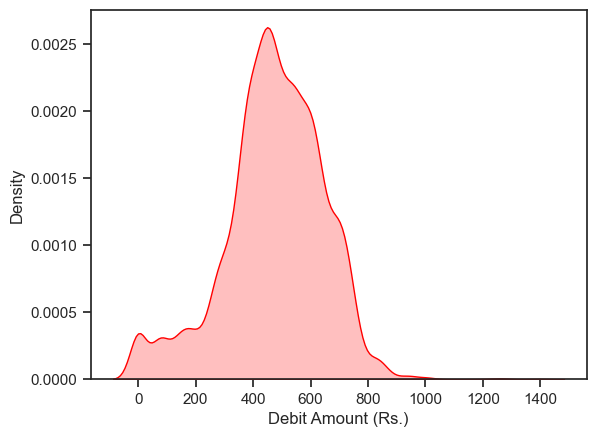

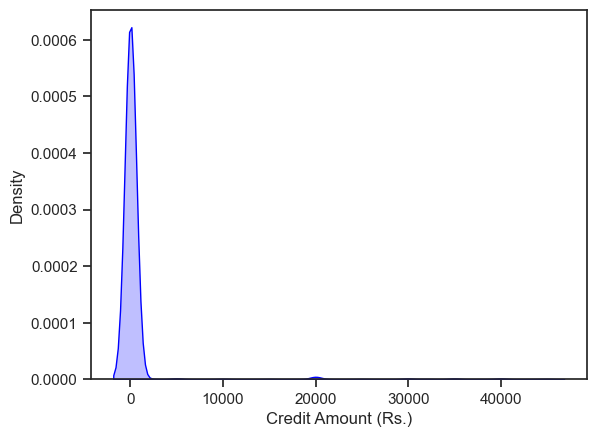

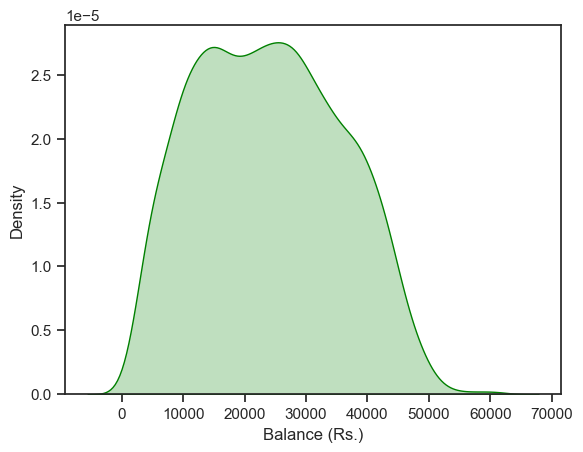

In [205]:
color = ['red', 'blue', 'green']

for i,j in zip(data_num.columns,color):
    sns.kdeplot(data=data_num[i],fill=True,color=j)
    plt.show()